In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statistics
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import graphviz
from plotnine import *
import scipy.stats as sps
from sklearn import preprocessing
import sklearn.metrics as skm
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.model_selection import train_test_split
warnings.simplefilter(action="ignore")

In [2]:
warrenty = pd.read_excel('warranty_rev1.xlsx')

In [3]:
warrenty

,Claim No,ASC Name,ASC ID,Customer /Vehicle Make,Zone,Town,Product family,Part Number,Description,slno,...,QA Assessment - Customer,Claim Entered,Quality Approved Date,price1,price2,price3,price4,price5,Total Price,After Sale Period - MIS
0,WILNIIIRC,Chopra Sales & Service,450250,Tata Motors Limited -TML,North,North West Delhi,Air Dryer,4611000770,Air Dryer,LA050721,...,Part Found OK - NFF,2022-11-04 00:00:00,2022-01-06 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,7
1,WILL4T6S5,HERITAGE AUTO EXPERTS,450490,Tata Motors Limited -TML,West,Pune,Dual Brake Valve,4611000080,Dual Brake Valve with Spout,1A191020,...,NaN,2022-01-04 00:00:00,2022-08-04 00:00:00,111.1,0.0,0.0,0.0,0.0,111.1,3
2,WILNMQAQH,VIKASH AIR PRESSURE,450225,Volvo Eicher - VECV,North,Gurgaon,Dual Brake Valve,4611001270,Foot Brake Valve,1B020921,...,NaN,2022-01-04 00:00:00,2022-08-04 00:00:00,65.4,0.0,0.0,0.0,0.0,65.4,5
3,WILE48ZVN,VIKASH AIR PRESSURE,450225,Volvo Eicher - VECV,North,Gurgaon,Dual Brake Valve,4611001270,Foot Brake Valve,1A02032,...,NaN,2022-01-04 00:00:00,2022-08-04 00:00:00,65.4,0.0,0.0,0.0,0.0,65.4,9
4,WILYNI23A,Arvind Motors Pvt Ltd,451055,Tata Motors Limited -TML,South,Dakshina Kannada,Dual Brake Valve,4611000770,Dual Brake Valve,NaN,...,NaN,2022-01-04 00:00:00,2022-08-04 00:00:00,65.4,0.0,0.0,0.0,0.0,65.4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7327,WILDIZZ5Y,RAVI BOOSTER WORKS,450975,Ashok Leyland,South,Tiruvallur,Compressor,9121700040,Compressor,16/03/2022,...,Ashok Leyland,2022-05-09 00:00:00,20/09/2022,85.9,275.0,0.0,0.0,0.0,360.9,3
7328,WILV84JE5,BUDHA DIESEL,450761,Volvo Eicher - VECV,East,Gaya,Compressor,9129700590,160 cc with side PR Compressor,9490121,...,Others,2022-05-09 00:00:00,NaN,90.6,350.0,0.0,0.0,0.0,440.6,18
7329,WILBECHA3,DIESEL INDIA,451000,Ashok Leyland,North,Jodhpur,Air Processing Unit - APU,9325001960,APU,1B160320,...,Ashok Leyland,2022-05-09 00:00:00,16/09/2022,0.0,0.0,0.0,0.0,0.0,0.0,21
7330,WILYTNOLJ,Automotive Seva Point,450037,Tata Motors Limited -TML,West,Aurangabad,Clutch Servo,9700516530,Clutch Servo,61021,...,TATA Motors,2022-05-09 00:00:00,16/09/2022,102.3,0.0,0.0,0.0,0.0,102.3,7


In [4]:
pd.crosstab(warrenty.Description,warrenty.Zone)

Zone,East,NORTH,North,SOUTH,Select Region,South,WEST,West
Description,,,,,,,,
12 V Modulator Valve VOSS+Metric,0,0,0,1,0,0,0,4
12 V modulator Valve with voss,0,0,0,0,0,1,0,0
160 CC Compressor,0,0,0,0,0,1,0,1
160 CC Compressor - EML,0,0,2,0,0,0,0,2
160 cc Compressor,0,0,142,0,0,2,0,5
...,...,...,...,...,...,...,...,...
VTS ECU- DICV,1,0,0,0,0,0,0,0
Viton Air Dryer,0,0,0,0,0,0,0,1
clutch servo,0,0,1,0,0,0,0,0


In [5]:
warrenty.shape

(7332, 44)

In [6]:
warrenty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7332 entries, 0 to 7331
Data columns (total 44 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Claim No                  7332 non-null   object 
 1   ASC Name                  7332 non-null   object 
 2   ASC ID                    7332 non-null   int64  
 3   Customer /Vehicle Make    7332 non-null   object 
 4   Zone                      7332 non-null   object 
 5   Town                      7331 non-null   object 
 6   Product family            7332 non-null   object 
 7   Part Number               7332 non-null   object 
 8   Description               7330 non-null   object 
 9   slno                      7196 non-null   object 
 10  wabcosite                 7332 non-null   object 
 11  Quantity                  7320 non-null   float64
 12  Chasis No                 7332 non-null   object 
 13  ENG No                    6684 non-null   object 
 14  kms cove

In [7]:
warrenty.isnull().sum()

Claim No                       0
ASC Name                       0
ASC ID                         0
Customer /Vehicle Make         0
Zone                           0
Town                           1
Product family                 0
Part Number                    0
Description                    2
slno                         136
wabcosite                      0
Quantity                      12
Chasis No                      0
ENG No                       648
kms covered                    0
hrs covered                 7274
Registration Number           15
Date of Sale                   0
Date of Failure                0
Customer Complaint           428
failure mode                   0
Observation1                   5
Observation2                  25
Action Taken by ASC            0
Servicepart 1               2483
Q1                             5
Servicepart 2               6659
Q2                             2
Servicepart 3               7169
Q3                             3
Servicepar

In [8]:
warrenty.drop(['Claim No','ASC ID','Part Number','wabcosite','slno','Registration Number','Quality Approved Date','Chasis No','ENG No','hrs covered','QA Assessment - Customer','Servicepart 1','Servicepart 2','Servicepart 3','Servicepart 4','Servicepart 5'],inplace=True,axis=1)

In [9]:
warrenty.shape

(7332, 28)

In [10]:
warrenty.sample(6)

,ASC Name,Customer /Vehicle Make,Zone,Town,Product family,Description,Quantity,kms covered,Date of Sale,Date of Failure,...,Q4,Q5,Claim Entered,price1,price2,price3,price4,price5,Total Price,After Sale Period - MIS
1586,HINDUSTAN DIESEL,Volvo Eicher - VECV,West,Kachchh,Dual Brake Valve,Foot Brake Valve,1.0,35554.0,23/08/2021,14/05/2022,...,0.0,0,14/05/2022,65.4,0.0,0.0,0.0,0.0,65.4,9
3041,Spectra Cargo Engineers,Ashok Leyland,South,Hyderabad,Clutch Servo,Clutch Servo,1.0,11542.0,2022-02-05 00:00:00,22/06/2022,...,0.0,0,25/06/2022,111.4,0.0,0.0,0.0,0.0,111.4,1
4277,SHREE KRISHNA AUTOMOBILES,Mahindra Trucks & Buses - MTBD,North,Gurgaon,Clutch Servo,Clutch Servo,1.0,60114.0,17/04/2022,17/04/2022,...,0.0,0,25/07/2022,111.4,0.0,0.0,0.0,0.0,111.4,0
3671,Chopra Sales & Service,Tata Motors Limited -TML,North,North West Delhi,Air Processing Unit - APU,APU,1.0,16226.0,28/02/2022,2022-06-07 00:00:00,...,0.0,0,2022-12-07 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,5
3534,Gurumehar Pneumatic Sales & Service,Tata Motors Limited -TML,West,Mumbai,Solenoid Modulator Valve - 24V,Solenoid Modulator Valve,2.0,72448.0,25/02/2021,2022-02-07 00:00:00,...,0.0,0,2022-06-07 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,17
6809,Gurumehar Pneumatic Sales & Service,Tata Motors Limited -TML,West,Mumbai,Dual Brake Valve,Dual Brake Valve,1.0,72296.0,2021-03-04 00:00:00,15/09/2022,...,0.0,0,23/09/2022,135.3,0.0,0.0,0.0,0.0,135.3,17


In [11]:
median1 = warrenty['kms covered'].median()
median1

48148.5

In [12]:
warrenty['kms covered'].replace(np.nan,median1,inplace = True)

In [13]:
mean1 = warrenty['Quantity'].mean()
mean1

1.1564207650273224

In [14]:
warrenty['Quantity'].replace(np.nan,mean1,inplace = True)

In [15]:
mode1 = warrenty['Description'].mode().values[0]
mode1

'Clutch Servo'

In [16]:
warrenty['Description'].replace(np.nan,mode1,inplace = True)

In [17]:
mode2 = warrenty['Town'].mode().values[0]
mode2

'Mumbai'

In [18]:
warrenty['Town'].replace(np.nan,mode1,inplace = True)

In [19]:
mode3 = warrenty['Customer Complaint'].mode().values[0]
mode3

'LEAKAGE'

In [20]:
warrenty['Customer Complaint'].replace(np.nan,mode1,inplace = True)

In [21]:
mode4 = warrenty['Observation1'].mode().values[0]
mode4

0

In [22]:
warrenty['Observation1'].replace(np.nan,mode1,inplace = True)

In [23]:
mode5 = warrenty['Observation2'].mode().values[0]
mode5

'Select Observation2'

In [24]:
warrenty['Observation2'].replace(np.nan,mode1,inplace = True)

In [25]:
mean2 = warrenty['Q1'].mean()
mean2

0.7604749556435103

In [26]:
warrenty['Q1'].replace(np.nan,mean1,inplace = True)

In [27]:
mean3 = warrenty['Q2'].mean()
mean3

0.10982264665757162

In [28]:
warrenty['Q2'].replace(np.nan,mean1,inplace = True)

In [29]:
mean4 = warrenty['Q3'].mean()
mean4

0.025787965616045846

In [30]:
warrenty['Q3'].replace(np.nan,mean1,inplace = True)

In [31]:
mean5 = warrenty['Q4'].mean()
mean5

0.03737552857727459

In [32]:
warrenty['Q4'].replace(np.nan,mean1,inplace = True)

In [33]:
warrenty.isnull().sum()

ASC Name                   0
Customer /Vehicle Make     0
Zone                       0
Town                       0
Product family             0
Description                0
Quantity                   0
kms covered                0
Date of Sale               0
Date of Failure            0
Customer Complaint         0
failure mode               0
Observation1               0
Observation2               0
Action Taken by ASC        0
Q1                         0
Q2                         0
Q3                         0
Q4                         0
Q5                         0
Claim Entered              0
price1                     0
price2                     0
price3                     0
price4                     0
price5                     0
Total Price                0
After Sale Period - MIS    0
dtype: int64

In [34]:
duplicate = warrenty.duplicated()
print(duplicate.sum())

164


In [35]:
warrenty.drop_duplicates(inplace=True)

In [36]:
warrenty.duplicated().sum()

0

<AxesSubplot:>

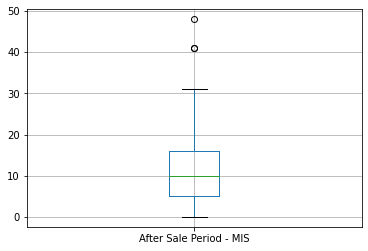

In [37]:
warrenty.boxplot(column = ['After Sale Period - MIS'])

<AxesSubplot:>

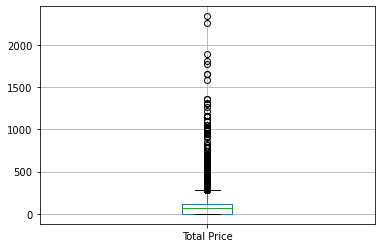

In [38]:
warrenty.boxplot(column = ['Total Price'])

<AxesSubplot:>

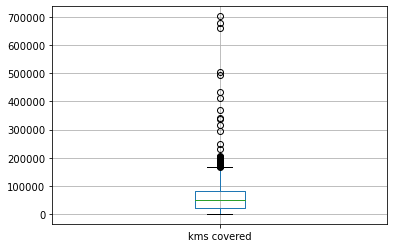

In [39]:
warrenty.boxplot(column = ['kms covered'])

In [40]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3 = col.quantile([0.25,0.75])
    IQR = Q3 - Q1
    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR
    return lower_range,upper_range

In [41]:
low_aftersale,high_aftersale = remove_outlier(warrenty['After Sale Period - MIS'])
warrenty['After Sale Period - MIS'] = np.where(warrenty['After Sale Period - MIS']>high_aftersale,high_aftersale,warrenty['After Sale Period - MIS'])
warrenty['After Sale Period - MIS'] = np.where(warrenty['After Sale Period - MIS']<low_aftersale,low_aftersale,warrenty['After Sale Period - MIS'])

<AxesSubplot:>

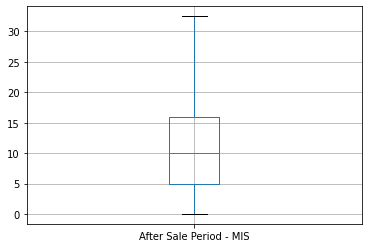

In [42]:
warrenty.boxplot(column=["After Sale Period - MIS"])

In [43]:
low_aftersale,high_aftersale = remove_outlier(warrenty['Total Price'])
warrenty['Total Price'] = np.where(warrenty['Total Price']>high_aftersale,high_aftersale,warrenty['Total Price'])
warrenty['Total Price'] = np.where(warrenty['Total Price']<low_aftersale,low_aftersale,warrenty['Total Price'])

<AxesSubplot:>

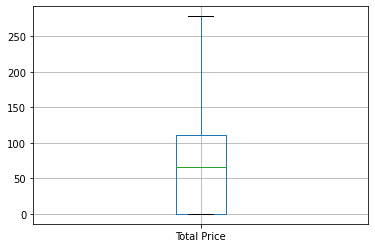

In [44]:
warrenty.boxplot(column=["Total Price"])

In [45]:
low_aftersale,high_aftersale = remove_outlier(warrenty['kms covered'])
warrenty['kms covered'] = np.where(warrenty['kms covered']>high_aftersale,high_aftersale,warrenty['kms covered'])
warrenty['kms covered'] = np.where(warrenty['kms covered']<low_aftersale,low_aftersale,warrenty['kms covered'])

<AxesSubplot:>

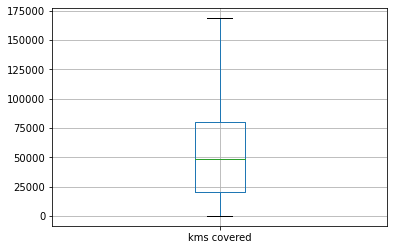

In [46]:
warrenty.boxplot(column=["kms covered"])

In [47]:
warrenty.dtypes

ASC Name                    object
Customer /Vehicle Make      object
Zone                        object
Town                        object
Product family              object
Description                 object
Quantity                   float64
kms covered                float64
Date of Sale                object
Date of Failure             object
Customer Complaint          object
failure mode                object
Observation1                object
Observation2                object
Action Taken by ASC         object
Q1                         float64
Q2                         float64
Q3                         float64
Q4                         float64
Q5                           int64
Claim Entered               object
price1                     float64
price2                     float64
price3                     float64
price4                     float64
price5                     float64
Total Price                float64
After Sale Period - MIS    float64
dtype: object

In [48]:
df = pd.get_dummies(warrenty,columns=['ASC Name','Customer /Vehicle Make','Zone','Town','Product family','Description','Date of Sale',
                                      'Date of Failure','Customer Complaint','failure mode','Observation1','Observation2','Action Taken by ASC',
                                      'Claim Entered'])

In [49]:
df.head(10)

,Quantity,kms covered,Q1,Q2,Q3,Q4,Q5,price1,price2,price3,...,Claim Entered_29/09/2022,Claim Entered_30/04/2022,Claim Entered_30/05/2022,Claim Entered_30/06/2022,Claim Entered_30/07/2022,Claim Entered_30/08/2022,Claim Entered_30/09/2022,Claim Entered_31/05/2022,Claim Entered_31/07/2022,Claim Entered_31/08/2022
0,1.0,23590.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,37412.0,1.0,0.0,0.0,0.0,0,111.1,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,38060.0,1.0,0.0,0.0,0.0,0,65.4,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,40500.0,1.0,0.0,0.0,0.0,0,65.4,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,1.0,21844.0,1.0,0.0,0.0,0.0,0,65.4,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
5,1.0,117993.0,1.0,0.0,0.0,0.0,0,277.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
6,1.0,31598.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
8,1.0,13054.0,1.0,0.0,0.0,0.0,0,23.7,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
9,1.0,114694.0,1.0,0.0,0.0,0.0,0,65.4,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
10,1.0,8601.0,1.0,0.0,0.0,0.0,0,102.3,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
table = pd.pivot_table(data=warrenty,index=['failure mode', 'Zone', 'ASC Name', 'Customer /Vehicle Make','Town','Product family','Total Price','After Sale Period - MIS'])
table

Q1  \
failure mode            Zone          ASC Name               Customer /Vehicle Make   Town        Product family              Total Price After Sale Period - MIS        
Back Pressure Not OK    Select Region Spectra Bangalore      BHARAT BENZ - DICV       Select City Exhaust Brake Valve - EBV   0.0         2.0                      1.0   
                                                                                                                                          3.0                      1.0   
                                                                                                                                          4.0                      1.0   
                                                                                                                                          5.0                      1.0   
Brake grabbing          North         Kishore Motor Service  Tata Motors Limited -TML Alwar       Dual Brake Valve            65.4        3.0                      1.0   
...                                                                                                                                                                ...   
Wind off rod Jam/Struck West          P.K.Automobiles        Tata Motors Limited -TML Nagpur      Spring Brake Actuator - SBA 41.0        4.0                      1.0   
                                                                                                                                          21.0                     1.0   
                                                                                                                              93.0        14.0                     1.0   
                                      PRAYAG SALES & SERVICE Tata Motors Limited -TML Katni       Spring Brake Actuator - SBA 0.0         13.0                     1.0   
                                      Sumit Air Brake        Volvo Eicher - VECV      Gwalior     Spring Brake Actuator - SBA 80.6        6.0                      1.0   

                                                                                                                                                                    Q2  \
failure mode            Zone          ASC Name               Customer /Vehicle Make   Town        Product family              Total Price After Sale Period - MIS        
Back Pressure Not OK    Select Region Spectra Bangalore      BHARAT BENZ - DICV       Select City Exhaust Brake Valve - EBV   0.0         2.0                      0.0   
                                                                                                                                          3.0                      0.0   
                                                                                                                                          4.0                      0.0   
                                                                                                                                          5.0                      0.0   
Brake grabbing          North         Kishore Motor Service  Tata Motors Limited -TML Alwar       Dual Brake Valve            65.4        3.0                      0.0   
...                                                                                                                                                                ...   
Wind off rod Jam/Struck West          P.K.Automobiles        Tata Motors Limited -TML Nagpur      Spring Brake Actuator - SBA 41.0        4.0                      0.0   
                                                                                                                                          21.0                     0.0   
                                                                                                                              93.0        14.0                     0.0   
                                      PRAYAG SALES & SERVICE Tata Motors Limited -T

In [51]:
table1 = pd.pivot_table(warrenty,index=['failure mode','ASC Name'],values=['Total Price'], aggfunc=np.mean)
table1

Total Price
failure mode            ASC Name                                    
Back Pressure Not OK    Spectra Bangalore                        0.0
Brake grabbing          Automotive Seva Point                   56.4
                        Gandhidham Air Brake System              0.0
                        HINDUSTAN DIESEL                        65.4
                        Kishore Motor Service                   65.4
...                                                              ...
Wind off rod Jam/Struck Sree Ganga Sales & Service             278.5
                        Sri Gajalakshmi Sales & Service        154.4
                        Sumit Air Brake                         80.6
                        Super H&H                                0.0
                        Vitexo System & Solutions                0.0

[704 rows x 1 columns]

In [52]:
table2 = pd.pivot_table(warrenty,index=['failure mode','Product family'],values=['Total Price'], aggfunc=np.mean)
table2

Total Price
failure mode                    Product family                                              
Back Pressure Not OK            Exhaust Brake Valve - EBV                           0.000000
Brake grabbing                  Dual Brake Valve                                   63.631818
Clutch hard                     Clutch Servo                                      102.701923
Coolant Mixup with delivery     Brake Chamber                                     128.000000
                                Compressor                                        107.294375
...                                                                                      ...
Water Collection in the airtank Air Processing and Distribution Assembly - APDA   174.500000
                                Air dryer                                         114.125000
                                Drying and Distribution Unit - DDU                201.444444
Wind off rod Jam/Struck         Compressor                                          0.000000
                                Spring Brake Actuator - SBA                        62.543210

[107 rows x 1 columns]

In [53]:
table3 = pd.pivot_table(warrenty,index=['Customer /Vehicle Make','failure mode'],values=['After Sale Period - MIS'], aggfunc=np.sum)
table3

After Sale Period - MIS
Customer /Vehicle Make            failure mode                                            
Action Construction Equipment Ltd Hand Brake Valve Not working                         0.0
                                  Leakage                                              0.0
                                  NFF - No Fault Found                                 5.0
Ashok Leyland                     Brake grabbing                                      25.0
                                  Clutch hard                                        218.0
...                                                                                    ...
Volvo Eicher - VECV               Poor Braking                                       131.0
                                  Pushrod broken                                       6.0
                                  Seizure                                             16.0
                                  Water Collection in the airtank                    100.0
                                  Wind off rod Jam/Struck                             11.0

[119 rows x 1 columns]

In [54]:
func = lambda x: 100*x.count()/df.shape[0]
table4 = pd.pivot_table(warrenty,index=['failure mode'],values=['price1'], aggfunc=func)
table4

,price1
failure mode,
Back Pressure Not OK,0.139509
Brake grabbing,0.306920
Clutch hard,1.450893
Coolant Mixup with delivery,2.246094
Cut-in Pressure Not OK,0.111607
Cut-out Pressure Not OK,0.279018
DDU - tank Stud broken,0.013951
ECU Not working,0.027902
Exhaust Brake Valve Not working,0.097656


<AxesSubplot:xlabel='failure mode'>

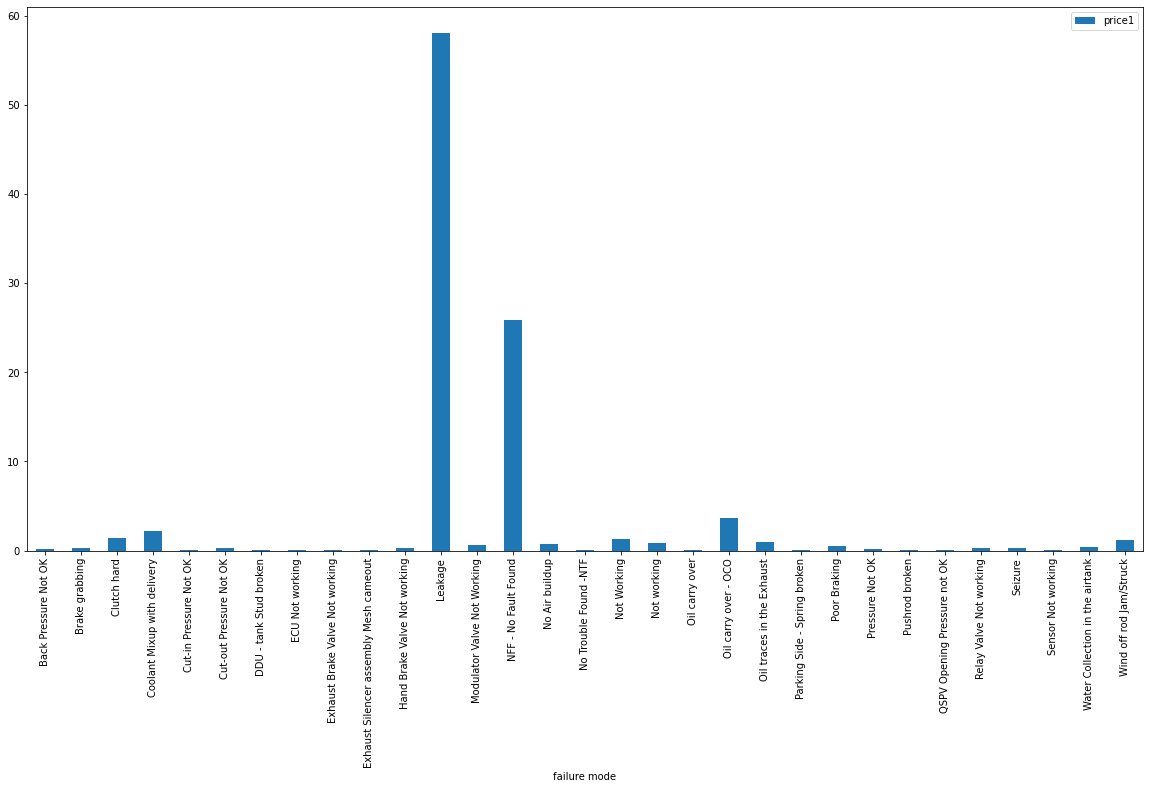

In [55]:
table4.plot(kind='bar',figsize=(20,10))

In [56]:
func = lambda x: 100*x.count()/df.shape[0]
table4 = pd.pivot_table(warrenty,index=['Town'],values=['kms covered'], aggfunc=np.sum)
table4

,kms covered
Town,
Agra,6882897.125
Ahmed Nagar,510574.000
Ahmedabad,8819084.000
Ajmer,1373548.000
Akola,48525.000
...,...
West Delhi,326898.000
West Godavari,145333.000
West Singhbhum,70427.000


<AxesSubplot:ylabel='Density'>

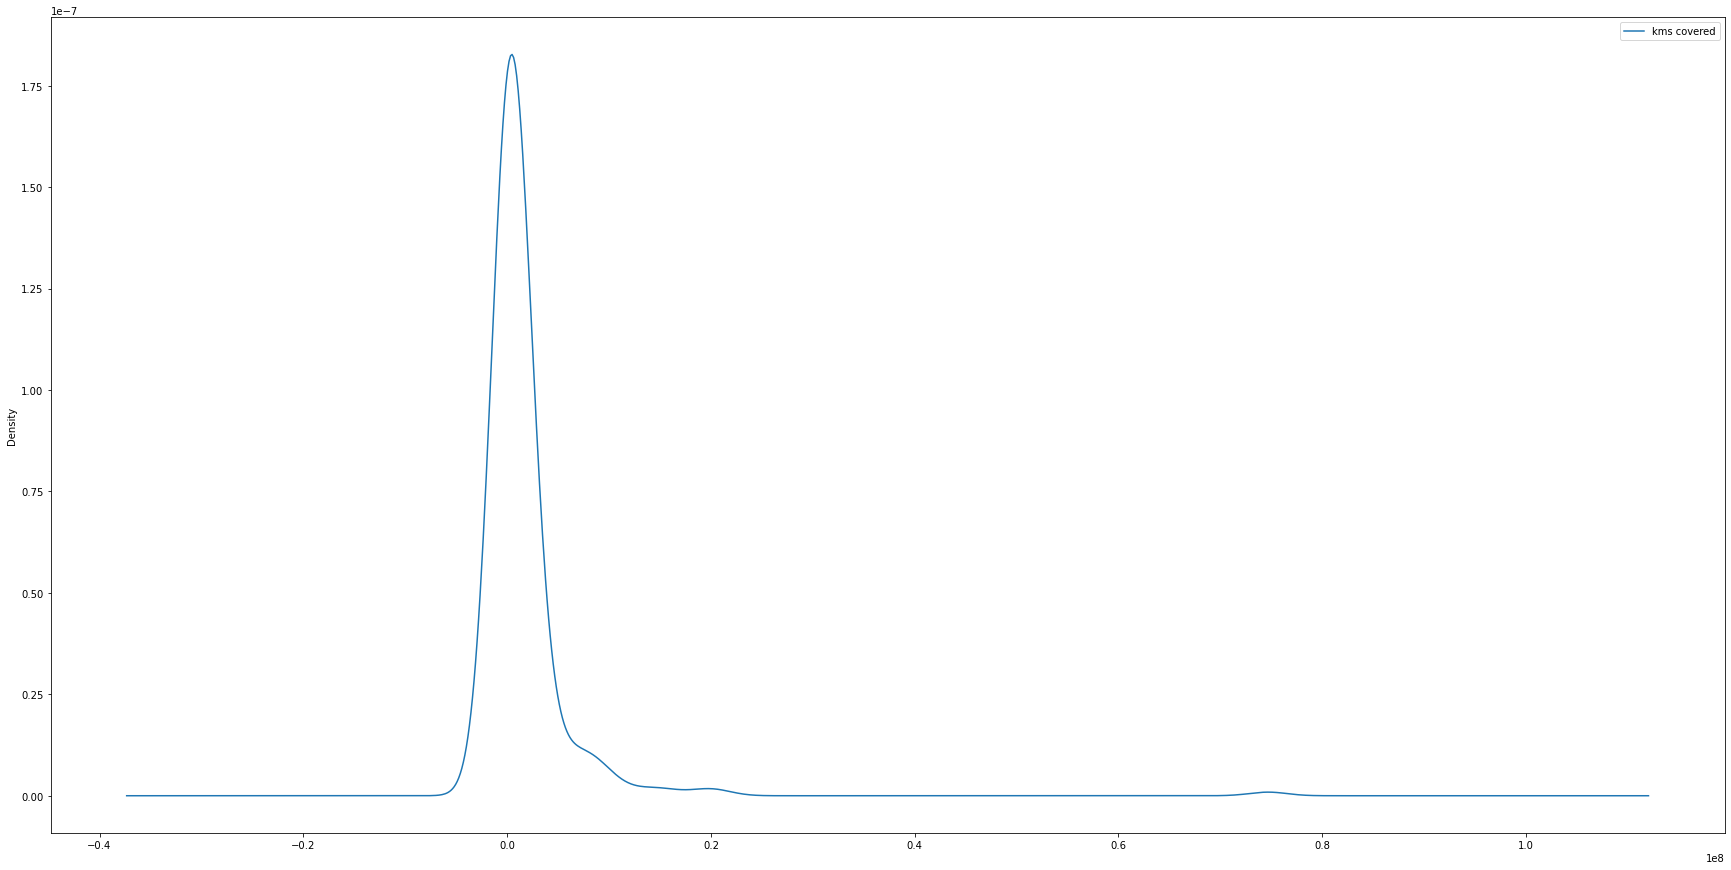

In [57]:
table4.plot(kind='kde',figsize=(30,15))

In [58]:
warrenty.groupby(["Total Price"]).mean()

,Quantity,kms covered,Q1,Q2,Q3,Q4,Q5,price1,price2,price3,price4,price5,After Sale Period - MIS
Total Price,,,,,,,,,,,,,
0.0,1.234979,48973.892424,0.319547,0.015716,0.003075,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.079262
2.4,1.000000,823.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.400000,0.000000,0.000000,0.000000,0.000000,6.000000
6.0,2.000000,50887.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,7.000000
6.9,1.000000,54634.000000,1.000000,0.000000,0.000000,0.000000,0.000000,6.900000,0.000000,0.000000,0.000000,0.000000,17.000000
9.3,1.000000,1993.000000,1.000000,1.000000,0.000000,0.000000,0.000000,6.900000,2.400000,0.000000,0.000000,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
271.2,1.000000,19877.000000,1.000000,0.000000,0.000000,0.000000,0.000000,271.200000,0.000000,0.000000,0.000000,0.000000,5.000000
274.1,1.000000,94888.000000,1.000000,1.000000,0.000000,0.000000,0.000000,36.700000,237.400000,0.000000,0.000000,0.000000,17.000000
275.0,1.000000,46490.000000,1.000000,1.000000,1.000000,0.000000,0.000000,169.000000,30.000000,76.000000,0.000000,0.000000,10.000000


In [59]:
model1 = LogisticRegression()

In [60]:
df

,Quantity,kms covered,Q1,Q2,Q3,Q4,Q5,price1,price2,price3,...,Claim Entered_29/09/2022,Claim Entered_30/04/2022,Claim Entered_30/05/2022,Claim Entered_30/06/2022,Claim Entered_30/07/2022,Claim Entered_30/08/2022,Claim Entered_30/09/2022,Claim Entered_31/05/2022,Claim Entered_31/07/2022,Claim Entered_31/08/2022
0,1.0,23590.000,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,37412.000,1.0,0.0,0.0,0.0,0,111.1,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,38060.000,1.0,0.0,0.0,0.0,0,65.4,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,40500.000,1.0,0.0,0.0,0.0,0,65.4,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,1.0,21844.000,1.0,0.0,0.0,0.0,0,65.4,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7327,1.0,26747.000,1.0,1.0,0.0,0.0,0,85.9,275.0,0.0,...,0,0,0,0,0,0,0,0,0,0
7328,1.0,86033.000,1.0,1.0,0.0,0.0,0,90.6,350.0,0.0,...,0,0,0,0,0,0,0,0,0,0
7329,1.0,168669.375,1.0,0.0,0.0,0.0,0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
7330,1.0,75493.000,1.0,0.0,0.0,0.0,0,102.3,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
x = df.drop(['After Sale Period - MIS'],axis=1)
y = df[['After Sale Period - MIS']]

In [62]:
x_train,x_test ,y_train,y_test = train_test_split(x,y,test_size = 0.30,random_state = 1)

In [63]:
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(y)

Text(0, 0.5, 'Frequency')

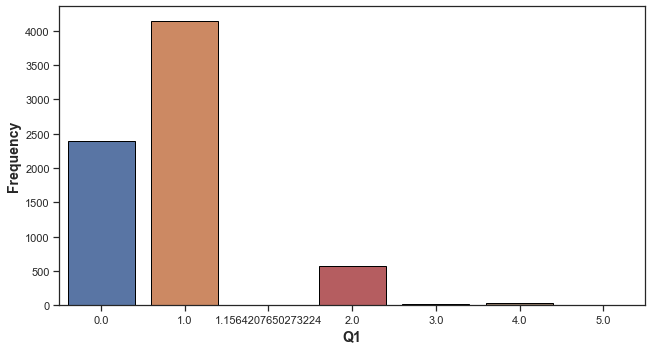

In [64]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

plt.figure(figsize=(10.5, 5.5))

sns.countplot(x='Q1', data=df, edgecolor='black')

plt.xlabel('Q1', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')



Text(0, 0.5, 'Frequency')

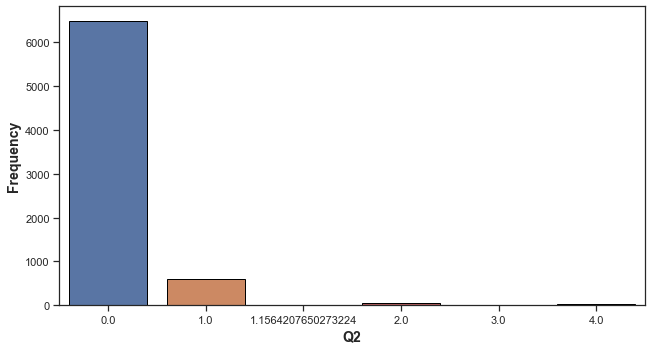

In [65]:
plt.figure(figsize=(10.5, 5.5))

sns.countplot(x='Q2', data=df, edgecolor='black')

plt.xlabel('Q2', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')


Text(0, 0.5, 'Frequency')

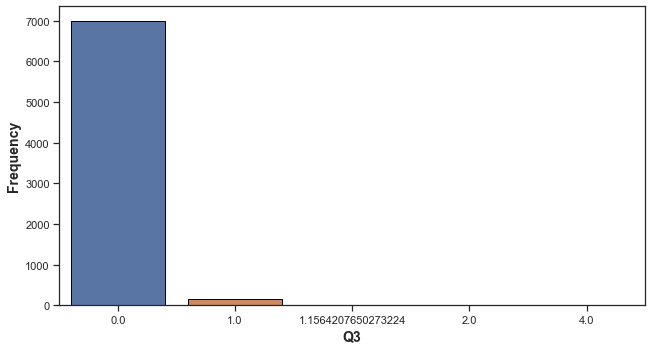

In [66]:
plt.figure(figsize=(10.5, 5.5))

sns.countplot(x='Q3', data=df, edgecolor='black')

plt.xlabel('Q3', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

Text(0, 0.5, 'Frequency')

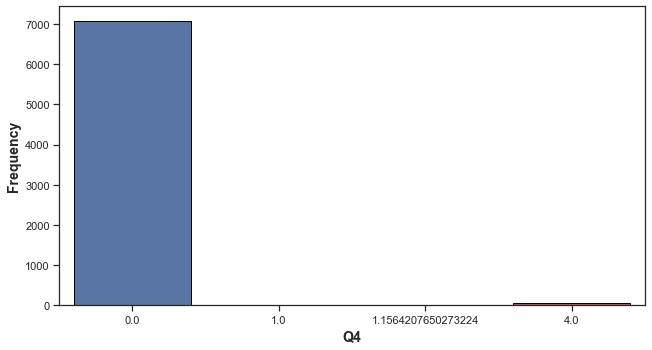

In [67]:
plt.figure(figsize=(10.5, 5.5))

sns.countplot(x='Q4', data=df, edgecolor='black')

plt.xlabel('Q4', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

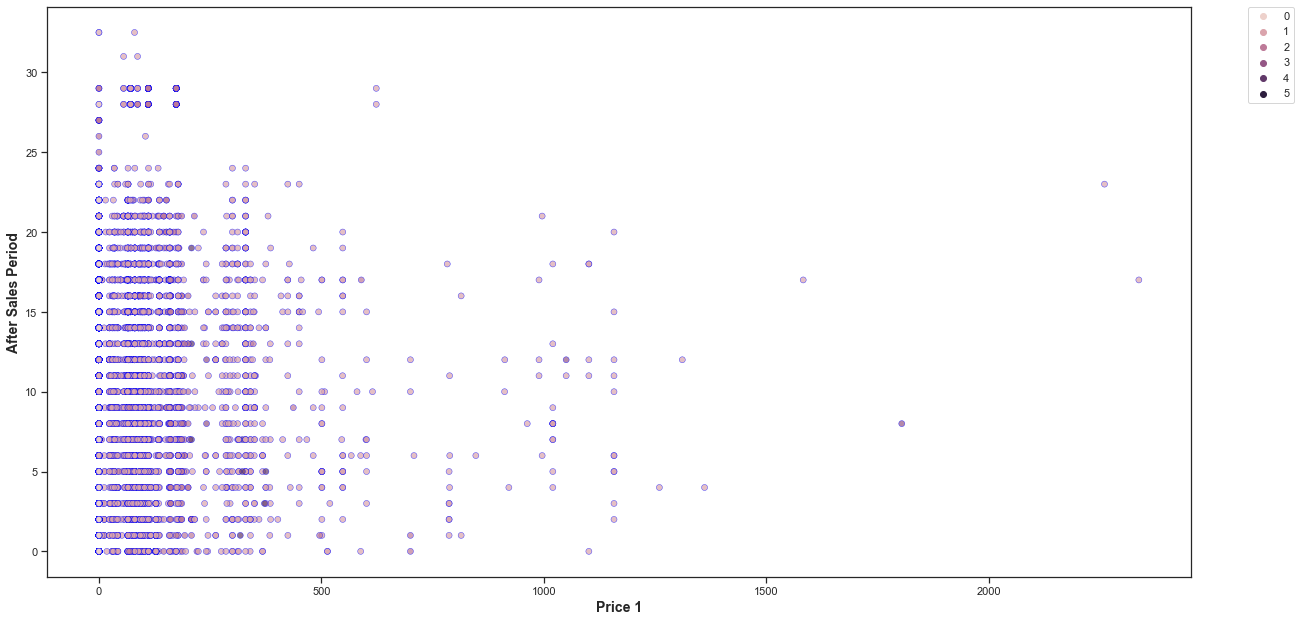

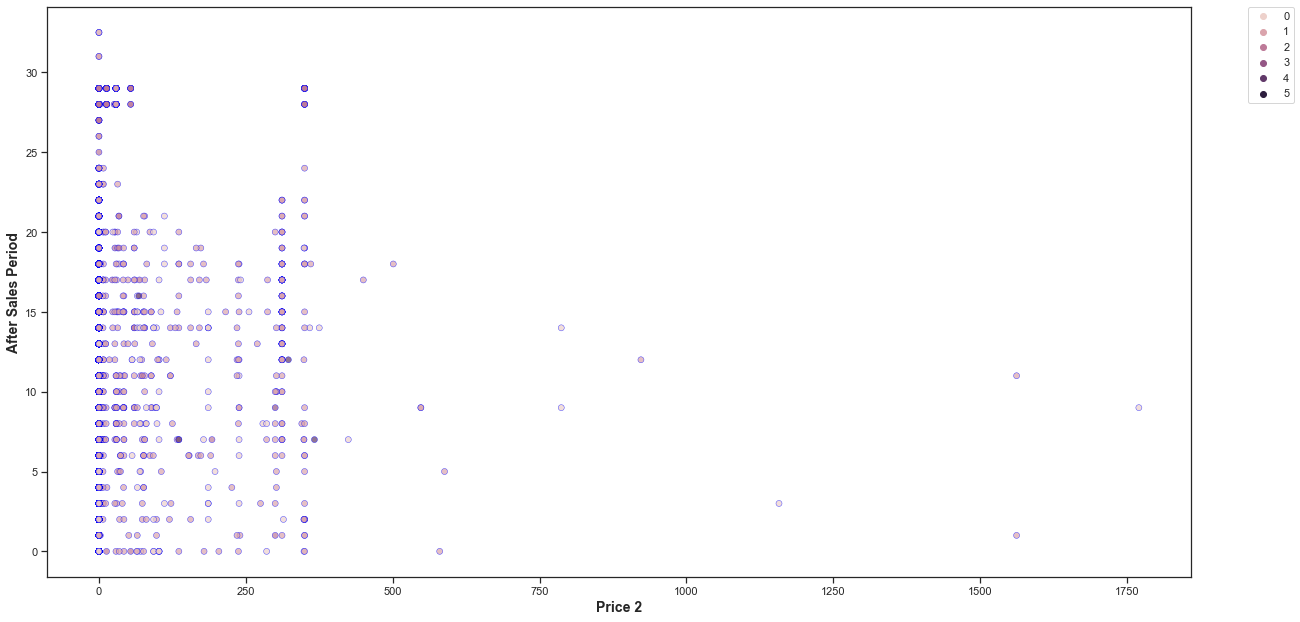

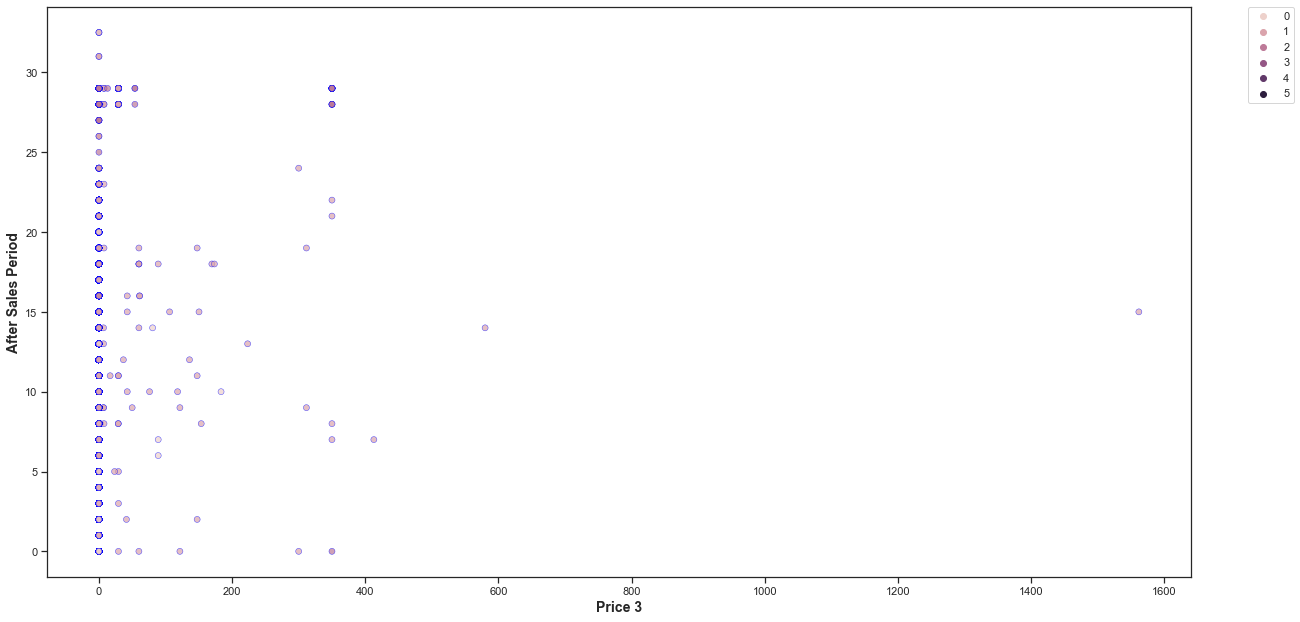

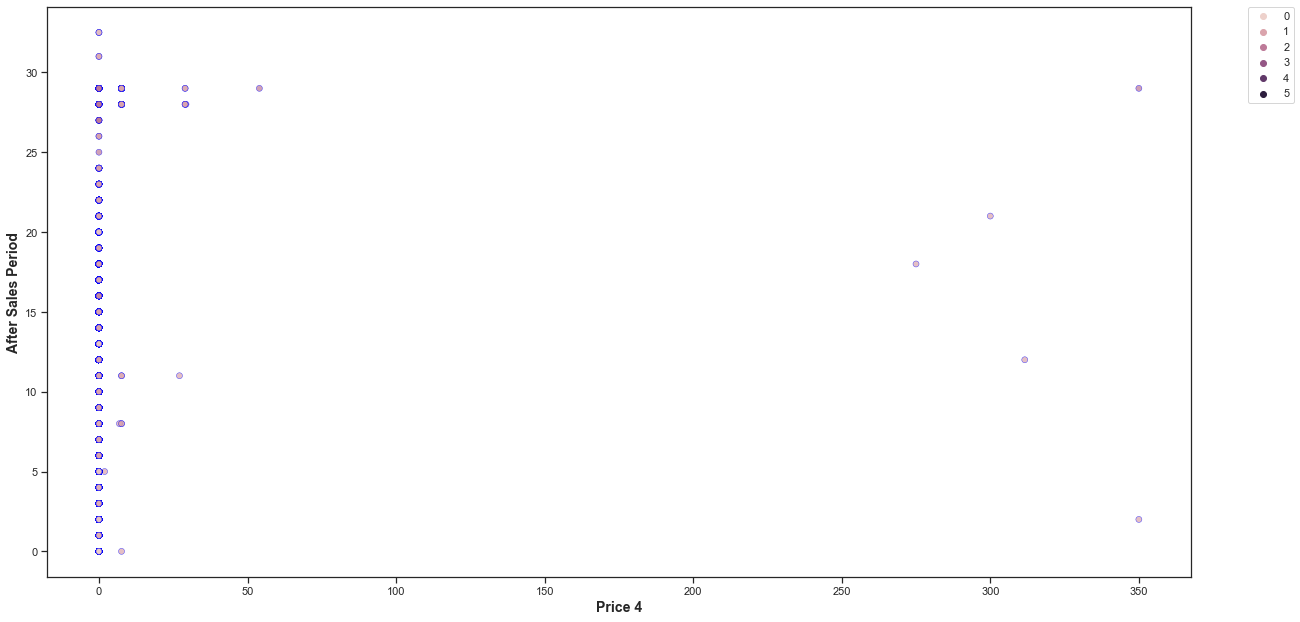

In [68]:
plt.figure(figsize=(20.5, 10.5))

sns.scatterplot(x='price1', y='After Sale Period - MIS', data=df, hue='Q1', edgecolor='blue', alpha=0.7)

plt.xlabel('Price 1', fontsize=14, fontweight='bold')
plt.ylabel('After Sales Period', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

plt.figure(figsize=(20.5, 10.5))

sns.scatterplot(x='price2', y='After Sale Period - MIS', data=df, hue='Q1', edgecolor='blue', alpha=0.7)

plt.xlabel('Price 2', fontsize=14, fontweight='bold')
plt.ylabel('After Sales Period', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)


plt.figure(figsize=(20.5, 10.5))

sns.scatterplot(x='price3', y='After Sale Period - MIS', data=df, hue='Q1', edgecolor='blue', alpha=0.7)

plt.xlabel('Price 3', fontsize=14, fontweight='bold')
plt.ylabel('After Sales Period', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

plt.figure(figsize=(20.5, 10.5))

sns.scatterplot(x='price4', y='After Sale Period - MIS', data=df, hue='Q1', edgecolor='blue', alpha=0.7)

plt.xlabel('Price 4', fontsize=14, fontweight='bold')
plt.ylabel('After Sales Period', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

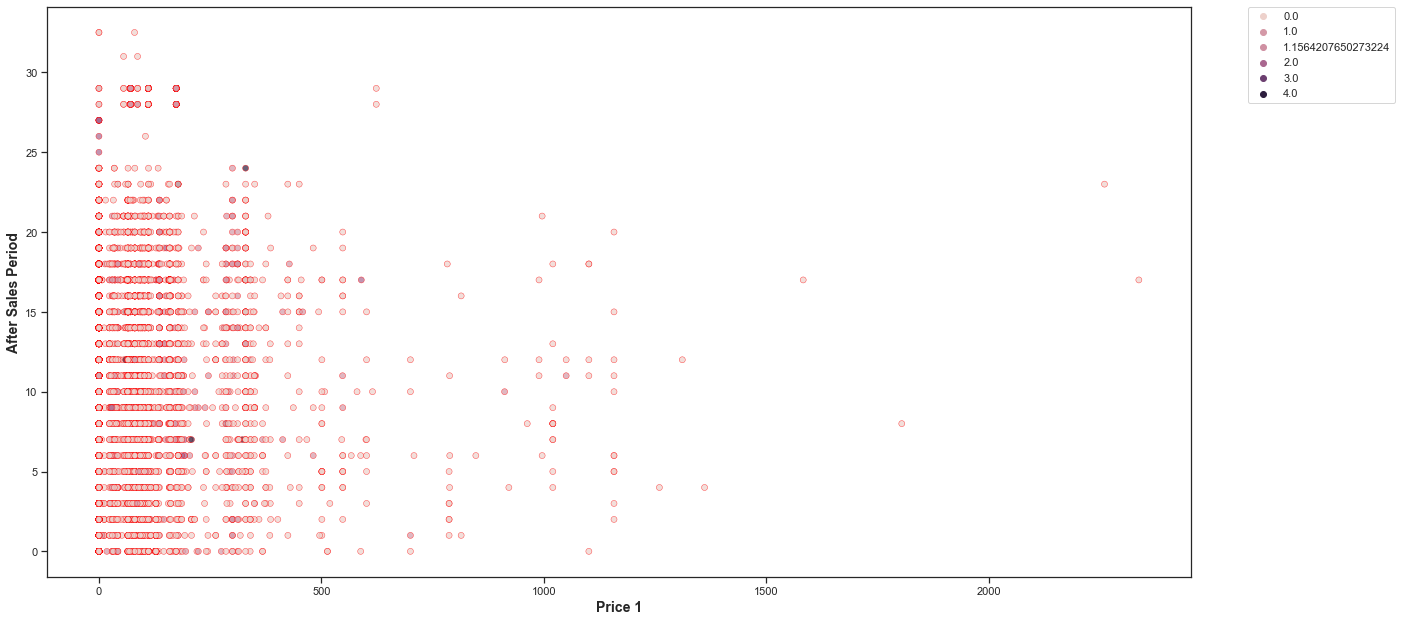

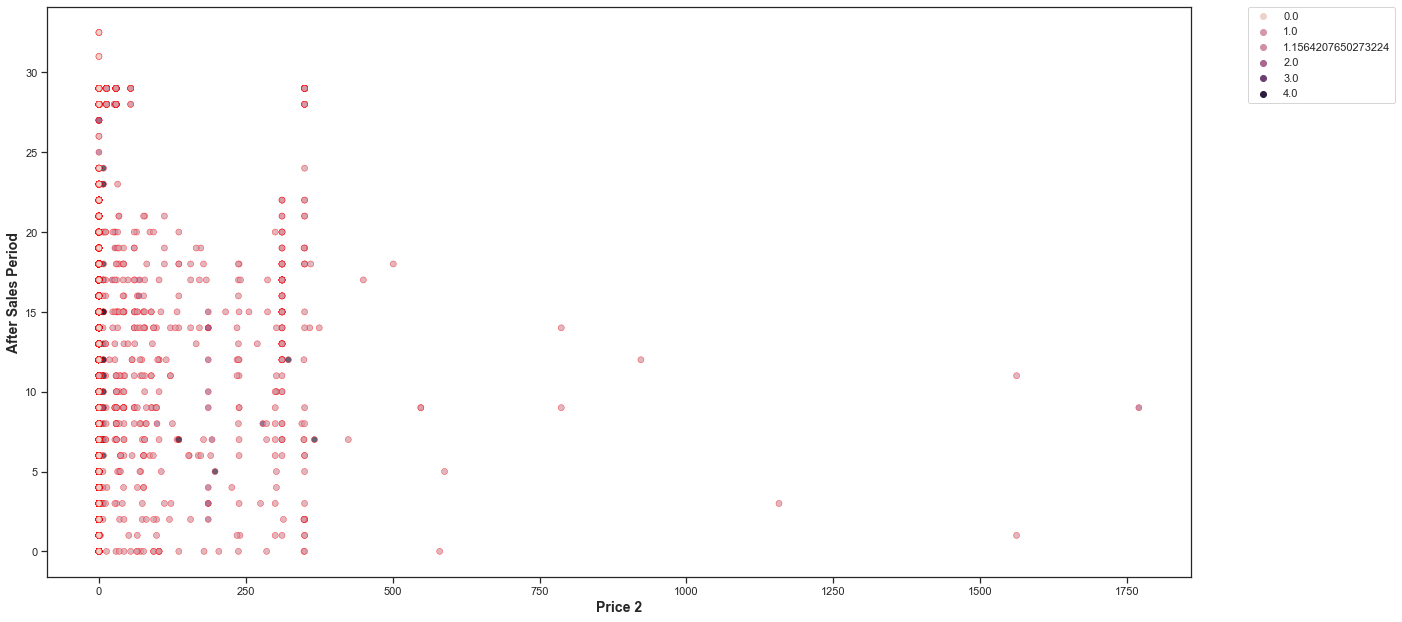

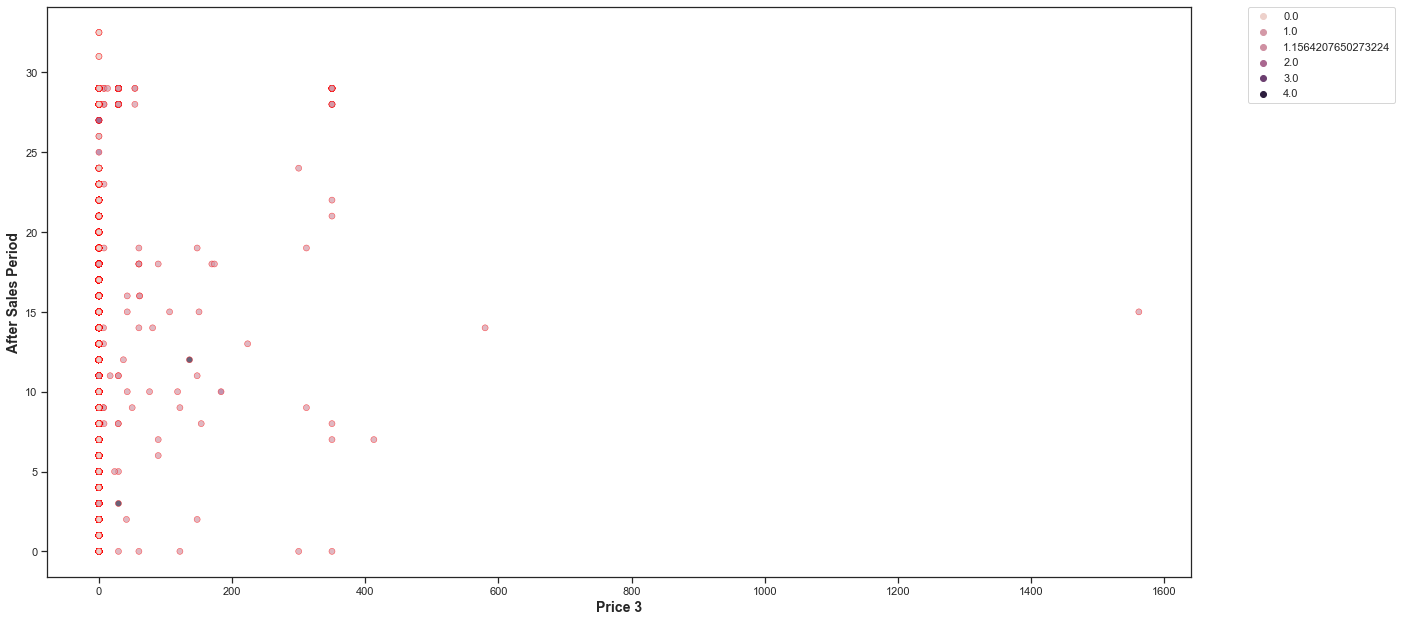

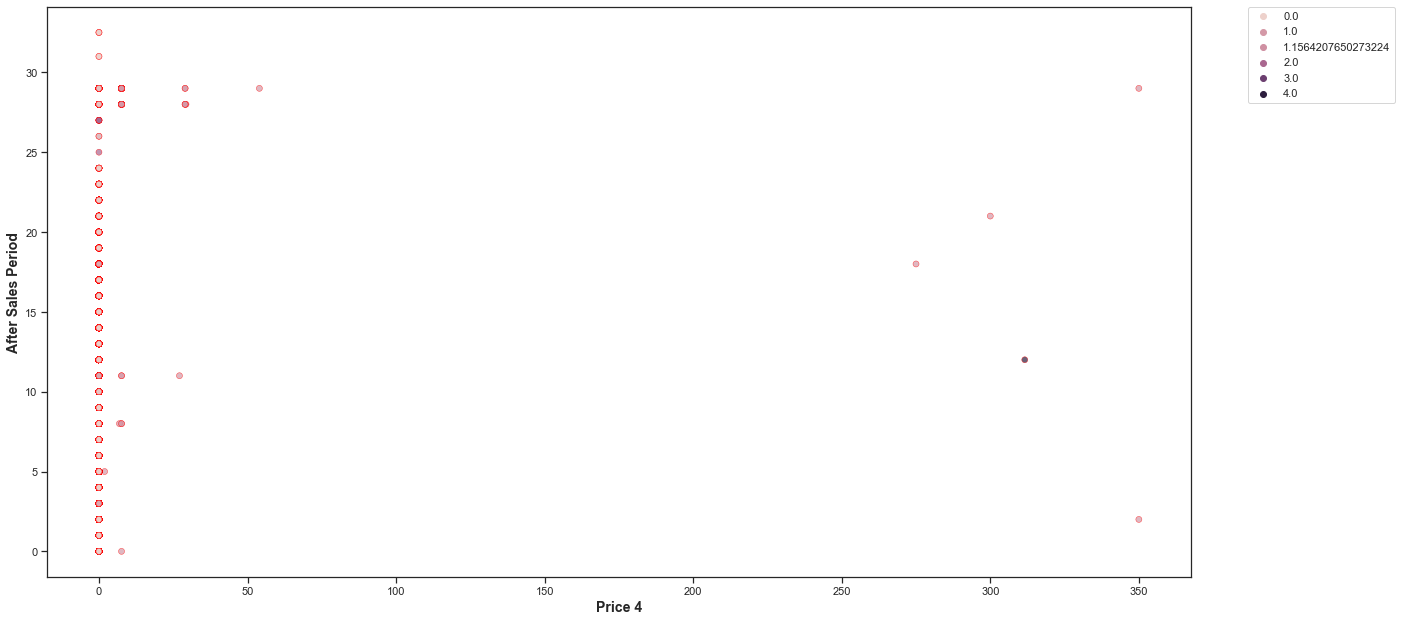

In [69]:
plt.figure(figsize=(20.5, 10.5))

sns.scatterplot(x='price1', y='After Sale Period - MIS', data=df, hue='Q2', edgecolor='red', alpha=0.7)

plt.xlabel('Price 1', fontsize=14, fontweight='bold')
plt.ylabel('After Sales Period', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

plt.figure(figsize=(20.5, 10.5))

sns.scatterplot(x='price2', y='After Sale Period - MIS', data=df, hue='Q2', edgecolor='red', alpha=0.7)

plt.xlabel('Price 2', fontsize=14, fontweight='bold')
plt.ylabel('After Sales Period', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

plt.figure(figsize=(20.5, 10.5))

sns.scatterplot(x='price3', y='After Sale Period - MIS', data=df, hue='Q2', edgecolor='red', alpha=0.7)

plt.xlabel('Price 3', fontsize=14, fontweight='bold')
plt.ylabel('After Sales Period', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

plt.figure(figsize=(20.5, 10.5))

sns.scatterplot(x='price4', y='After Sale Period - MIS', data=df, hue='Q2', edgecolor='red', alpha=0.7)

plt.xlabel('Price 4', fontsize=14, fontweight='bold')
plt.ylabel('After Sales Period', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

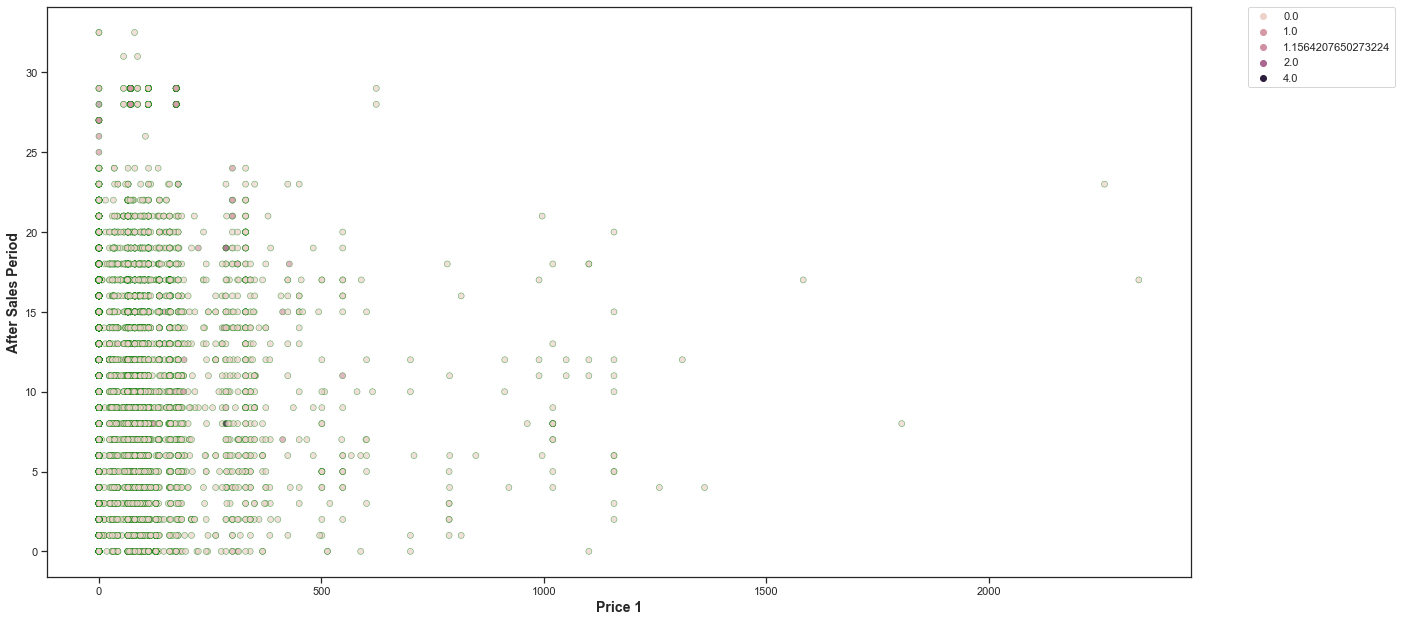

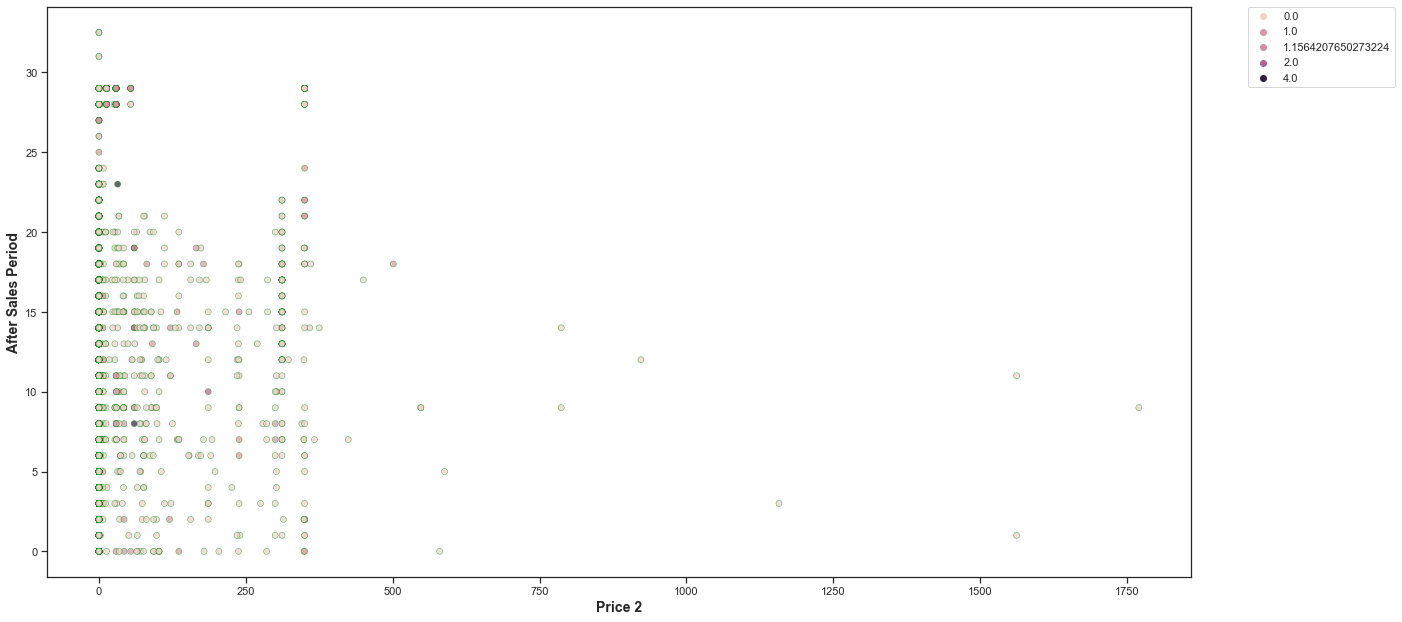

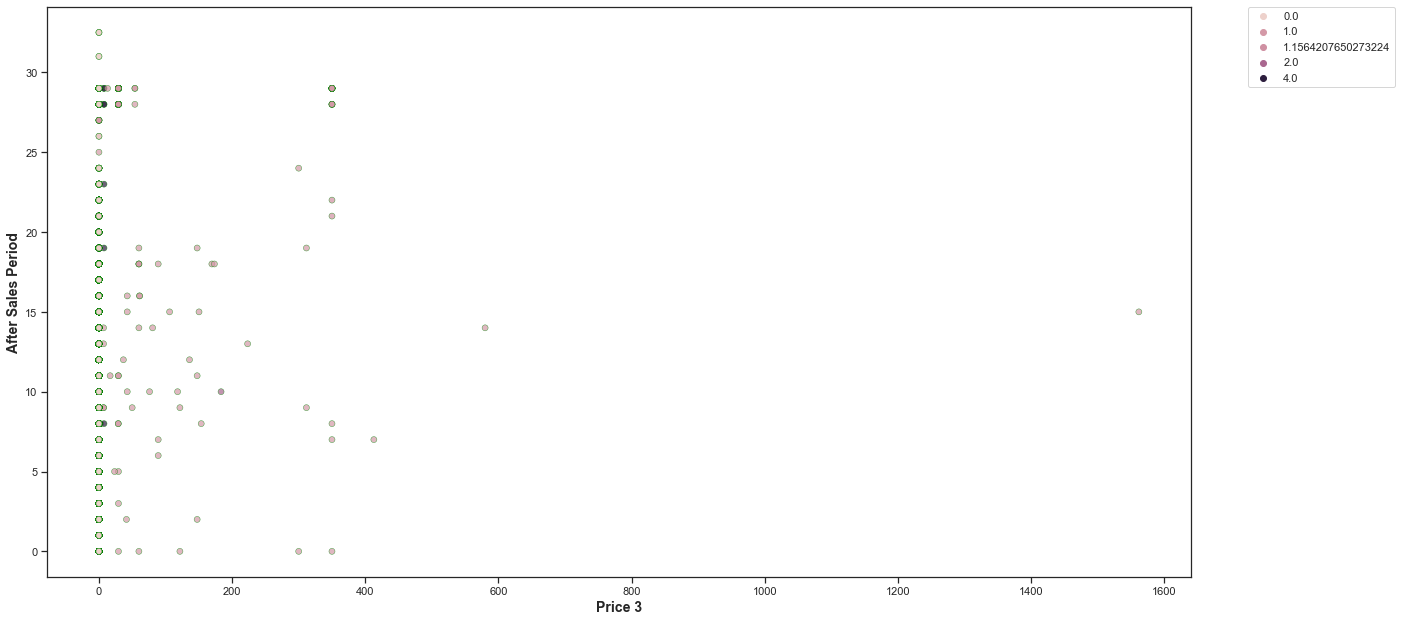

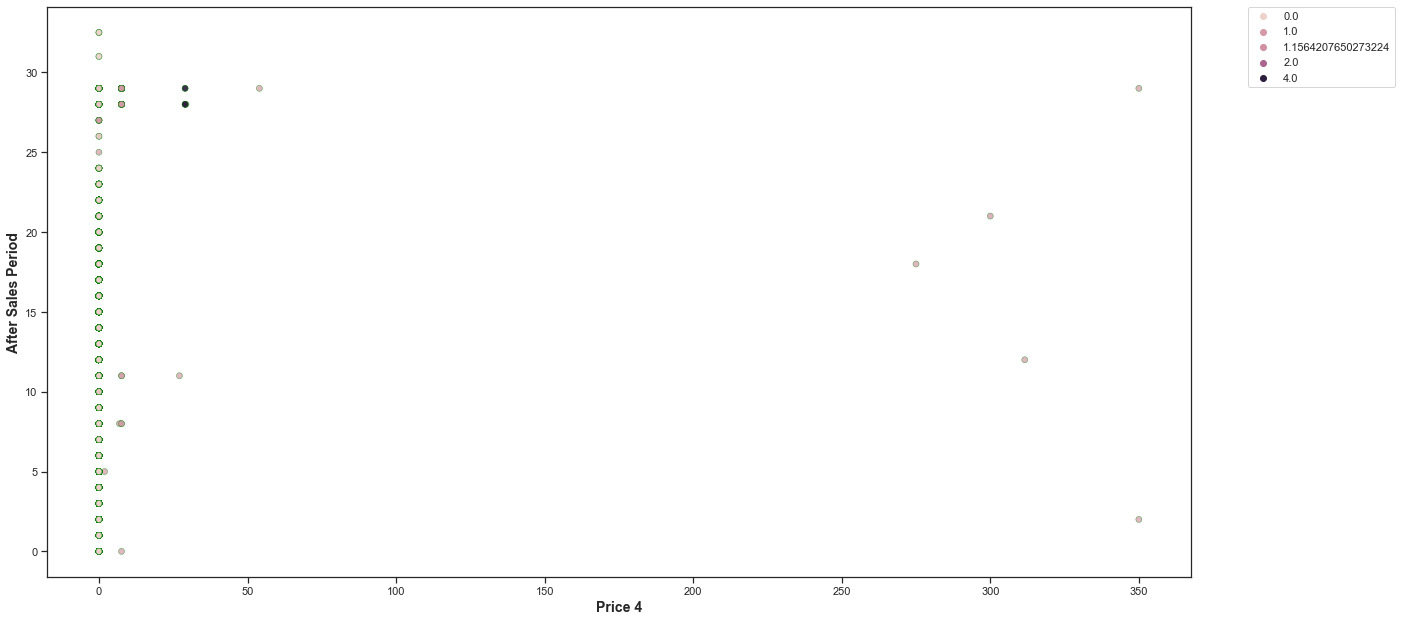

In [70]:
plt.figure(figsize=(20.5, 10.5))

sns.scatterplot(x='price1', y='After Sale Period - MIS', data=df, hue='Q3', edgecolor='green', alpha=0.7)

plt.xlabel('Price 1', fontsize=14, fontweight='bold')
plt.ylabel('After Sales Period', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

plt.figure(figsize=(20.5, 10.5))

sns.scatterplot(x='price2', y='After Sale Period - MIS', data=df, hue='Q3', edgecolor='green', alpha=0.7)

plt.xlabel('Price 2', fontsize=14, fontweight='bold')
plt.ylabel('After Sales Period', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

plt.figure(figsize=(20.5, 10.5))

sns.scatterplot(x='price3', y='After Sale Period - MIS', data=df, hue='Q3', edgecolor='green', alpha=0.7)

plt.xlabel('Price 3', fontsize=14, fontweight='bold')
plt.ylabel('After Sales Period', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

plt.figure(figsize=(20.5, 10.5))

sns.scatterplot(x='price4', y='After Sale Period - MIS', data=df, hue='Q3', edgecolor='green', alpha=0.7)

plt.xlabel('Price 4', fontsize=14, fontweight='bold')
plt.ylabel('After Sales Period', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

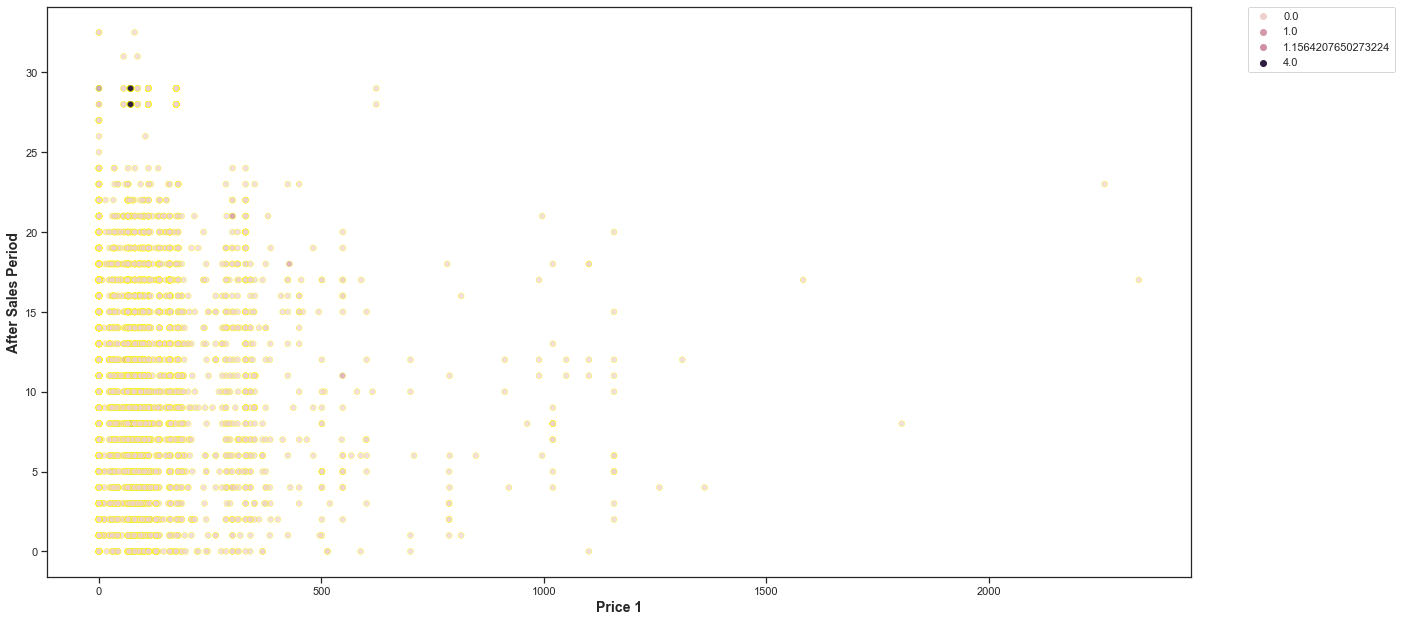

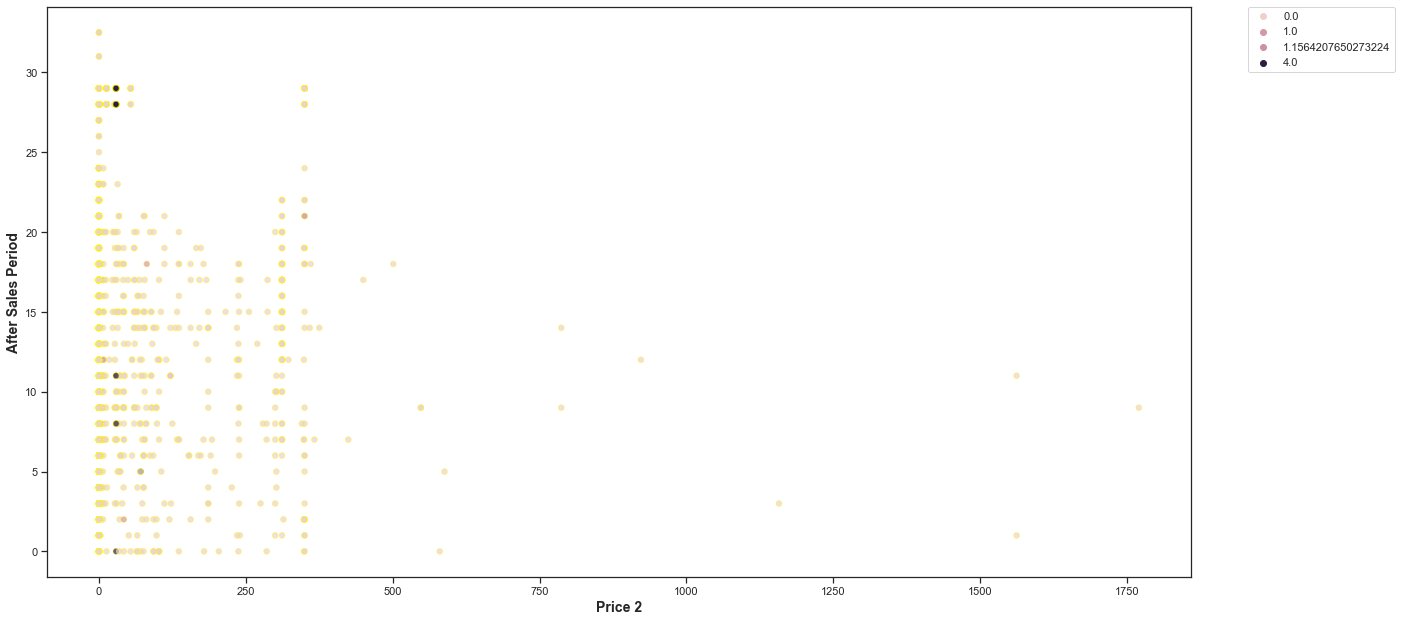

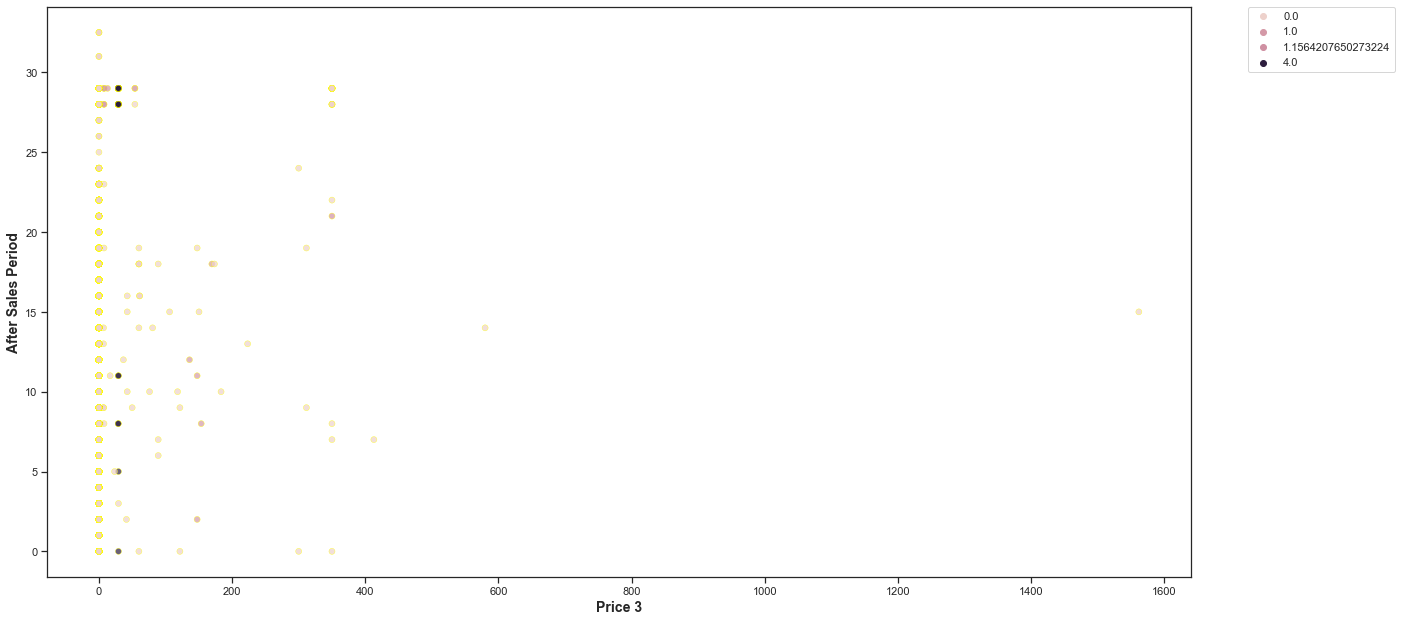

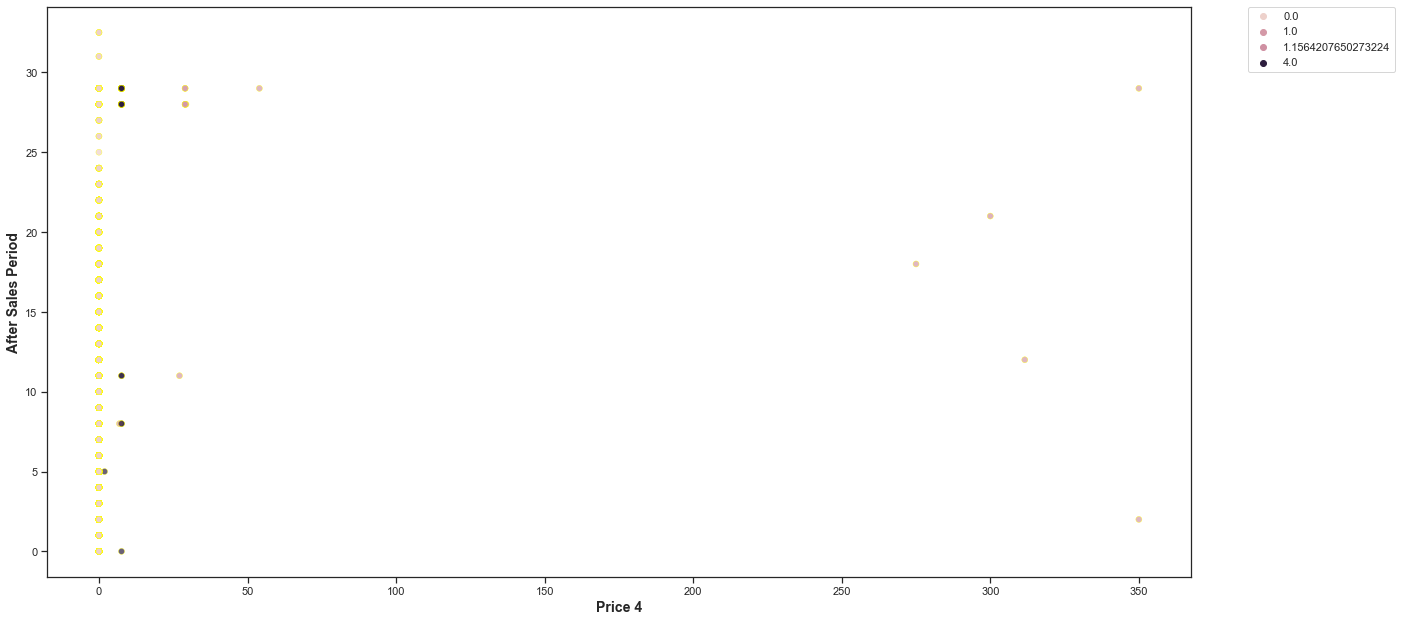

In [71]:
plt.figure(figsize=(20.5, 10.5))

sns.scatterplot(x='price1', y='After Sale Period - MIS', data=df, hue='Q4', edgecolor='yellow', alpha=0.7)

plt.xlabel('Price 1', fontsize=14, fontweight='bold')
plt.ylabel('After Sales Period', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

plt.figure(figsize=(20.5, 10.5))

sns.scatterplot(x='price2', y='After Sale Period - MIS', data=df, hue='Q4', edgecolor='yellow', alpha=0.7)

plt.xlabel('Price 2', fontsize=14, fontweight='bold')
plt.ylabel('After Sales Period', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

plt.figure(figsize=(20.5, 10.5))

sns.scatterplot(x='price3', y='After Sale Period - MIS', data=df, hue='Q4', edgecolor='yellow', alpha=0.7)

plt.xlabel('Price 3', fontsize=14, fontweight='bold')
plt.ylabel('After Sales Period', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

plt.figure(figsize=(20.5, 10.5))

sns.scatterplot(x='price4', y='After Sale Period - MIS', data=df, hue='Q4', edgecolor='yellow', alpha=0.7)

plt.xlabel('Price 4', fontsize=14, fontweight='bold')
plt.ylabel('After Sales Period', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

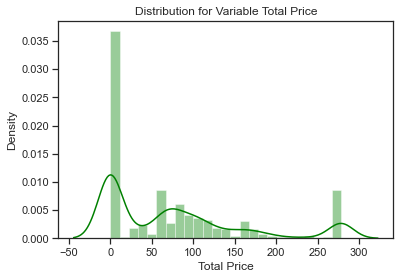

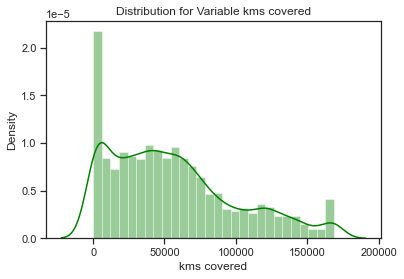

In [72]:
for i in ['Total Price', 'kms covered']:
    
    sns.distplot(df[i],bins='auto',color='green')
    plt.title("Distribution for Variable "+i)
    plt.ylabel("Density")
    plt.show()

In [73]:
df['Total Price'] = np.log1p(df['Total Price'])
df['kms covered'] = np.log1p(df['kms covered'])

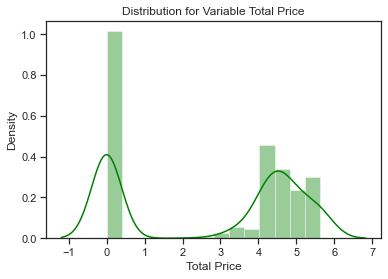

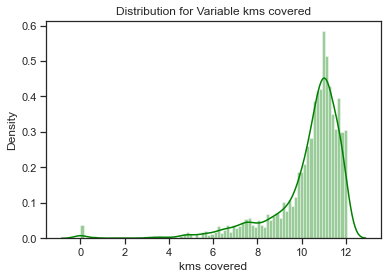

In [74]:
for i in ['Total Price', 'kms covered']:
    
    sns.distplot(df[i],bins='auto',color='green')
    plt.title("Distribution for Variable "+i)
    plt.ylabel("Density")
    plt.show()

In [75]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,df.columns != 'kms covered'], 
                         df.iloc[:, 0], test_size = 0.10)

In [76]:
print(X_train.shape)
print(X_test.shape)

(6451, 2931)
(717, 2931)


In [77]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression #ML algorithm
from sklearn.model_selection import train_test_split #splitting dataset
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from pprint import pprint
from sklearn.model_selection import GridSearchCV 

In [78]:
fit_LR = LinearRegression().fit(X_train , y_train)

In [79]:
pred_train_LR = fit_LR.predict(X_train)

In [80]:
pred_test_LR = fit_LR.predict(X_test)

In [81]:

RMSE_test_LR = np.sqrt(mean_squared_error(y_test, pred_test_LR))

RMSE_train_LR= np.sqrt(mean_squared_error(y_train, pred_train_LR))

In [82]:
print("Root Mean Squared Error For Training data = "+str(RMSE_train_LR))
print("Root Mean Squared Error For Test data = "+str(RMSE_test_LR))

Root Mean Squared Error For Training data = 2.3953406506546028e-14
Root Mean Squared Error For Test data = 7.362488244114389e-07


In [83]:
from sklearn.metrics import r2_score
r2_score(y_train, pred_train_LR)

1.0

In [84]:
r2_score(y_test, pred_test_LR)

0.9999999999969102

In [85]:
fit_DT = DecisionTreeRegressor(max_depth = 2).fit(X_train,y_train)

In [86]:
pred_train_DT = fit_DT.predict(X_train)


pred_test_DT = fit_DT.predict(X_test)

In [87]:
RMSE_train_DT = np.sqrt(mean_squared_error(y_train, pred_train_DT))

RMSE_test_DT = np.sqrt(mean_squared_error(y_test, pred_test_DT))

In [88]:
print("Root Mean Squared Error For Training data = "+str(RMSE_train_DT))
print("Root Mean Squared Error For Test data = "+str(RMSE_test_DT))

Root Mean Squared Error For Training data = 0.045792209825940296
Root Mean Squared Error For Test data = 0.04208234052074467


In [89]:
r2_score(y_train, pred_train_DT)

0.9874918394056206

In [90]:
r2_score(y_test, pred_test_DT)

0.989905931525004

In [91]:
fit_RF = RandomForestRegressor(n_estimators = 200).fit(X_train,y_train)

In [92]:
pred_train_RF = fit_RF.predict(X_train)

pred_test_RF = fit_RF.predict(X_test)

In [93]:

RMSE_train_RF = np.sqrt(mean_squared_error(y_train, pred_train_RF))
RMSE_test_RF = np.sqrt(mean_squared_error(y_test, pred_test_RF))

In [94]:
print("Root Mean Squared Error For Training data = "+str(RMSE_train_RF))
print("Root Mean Squared Error For Test data = "+str(RMSE_test_RF))

Root Mean Squared Error For Training data = 6.418315877873118e-17
Root Mean Squared Error For Test data = 5.804685408797747e-17


In [95]:
r2_score(y_train, pred_train_RF)

1.0

In [96]:
r2_score(y_test, pred_test_RF)

1.0

In [97]:
fit_GB = GradientBoostingRegressor().fit(X_train, y_train)

In [98]:
pred_train_GB = fit_GB.predict(X_train)


pred_test_GB = fit_GB.predict(X_test)

In [99]:

RMSE_train_GB = np.sqrt(mean_squared_error(y_train, pred_train_GB))

RMSE_test_GB = np.sqrt(mean_squared_error(y_test, pred_test_GB))

In [100]:
print("Root Mean Squared Error For Training data = "+str(RMSE_train_GB))
print("Root Mean Squared Error For Test data = "+str(RMSE_test_GB))

Root Mean Squared Error For Training data = 1.0875414582465463e-05
Root Mean Squared Error For Test data = 1.1125477179939906e-05


In [101]:
r2_score(y_test, pred_test_GB)

0.999999999294489

In [102]:
r2_score(y_train, pred_train_GB)

0.9999999992944921

In [103]:
df['After Sale Period - MIS'].unique()

array([ 7. ,  3. ,  5. ,  9. , 10. , 13. , 16. ,  1. ,  0. ,  4. , 14. ,
       18. ,  8. ,  6. ,  2. , 12. , 19. , 15. , 17. , 20. , 11. , 21. ,
       27. , 22. , 25. , 26. , 23. , 29. , 28. , 24. , 32.5, 31. ])

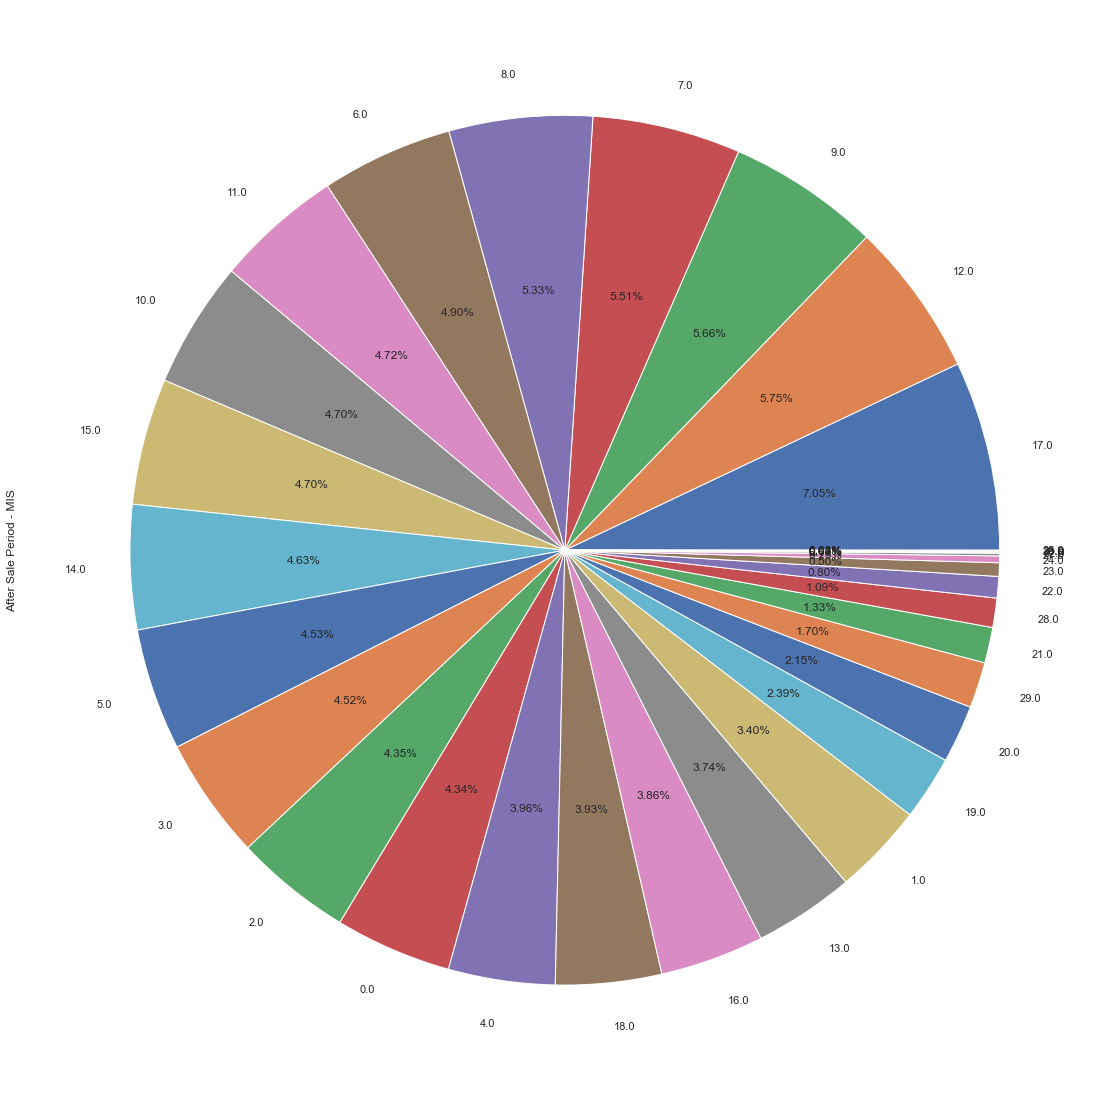

In [104]:
df['After Sale Period - MIS'].value_counts().plot(kind = 'pie', autopct = '%0.2f%%', figsize = [20,20])
plt.show()

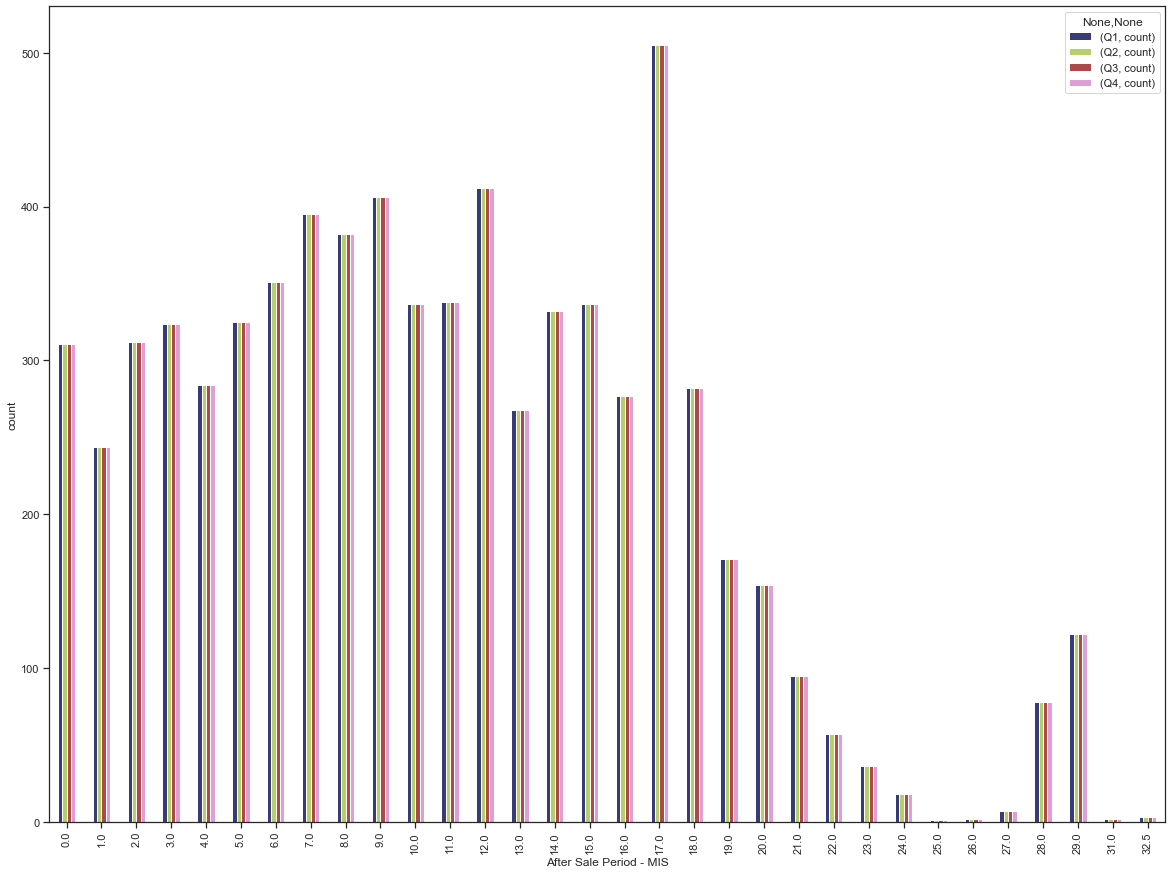

In [105]:
df.groupby(['After Sale Period - MIS']).agg({'Q1' : ['count'],
                                      'Q2' :['count'],
                                      'Q3' : ['count'],
                                    'Q4' :['count']}).plot(kind = 'bar', cmap = 'tab20b', figsize = [20,15])
plt.ylabel('count')
plt.show()

In [106]:
warrenty.head()

,ASC Name,Customer /Vehicle Make,Zone,Town,Product family,Description,Quantity,kms covered,Date of Sale,Date of Failure,...,Q4,Q5,Claim Entered,price1,price2,price3,price4,price5,Total Price,After Sale Period - MIS
0,Chopra Sales & Service,Tata Motors Limited -TML,North,North West Delhi,Air Dryer,Air Dryer,1.0,23590.0,15/09/2021,2022-11-04 00:00:00,...,0.0,0,2022-11-04 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,7.0
1,HERITAGE AUTO EXPERTS,Tata Motors Limited -TML,West,Pune,Dual Brake Valve,Dual Brake Valve with Spout,1.0,37412.0,30/01/2022,2022-01-04 00:00:00,...,0.0,0,2022-01-04 00:00:00,111.1,0.0,0.0,0.0,0.0,111.1,3.0
2,VIKASH AIR PRESSURE,Volvo Eicher - VECV,North,Gurgaon,Dual Brake Valve,Foot Brake Valve,1.0,38060.0,30/10/2021,30/03/2022,...,0.0,0,2022-01-04 00:00:00,65.4,0.0,0.0,0.0,0.0,65.4,5.0
3,VIKASH AIR PRESSURE,Volvo Eicher - VECV,North,Gurgaon,Dual Brake Valve,Foot Brake Valve,1.0,40500.0,29/06/2021,30/03/2022,...,0.0,0,2022-01-04 00:00:00,65.4,0.0,0.0,0.0,0.0,65.4,9.0
4,Arvind Motors Pvt Ltd,Tata Motors Limited -TML,South,Dakshina Kannada,Dual Brake Valve,Dual Brake Valve,1.0,21844.0,2021-11-06 00:00:00,2022-01-04 00:00:00,...,0.0,0,2022-01-04 00:00:00,65.4,0.0,0.0,0.0,0.0,65.4,10.0


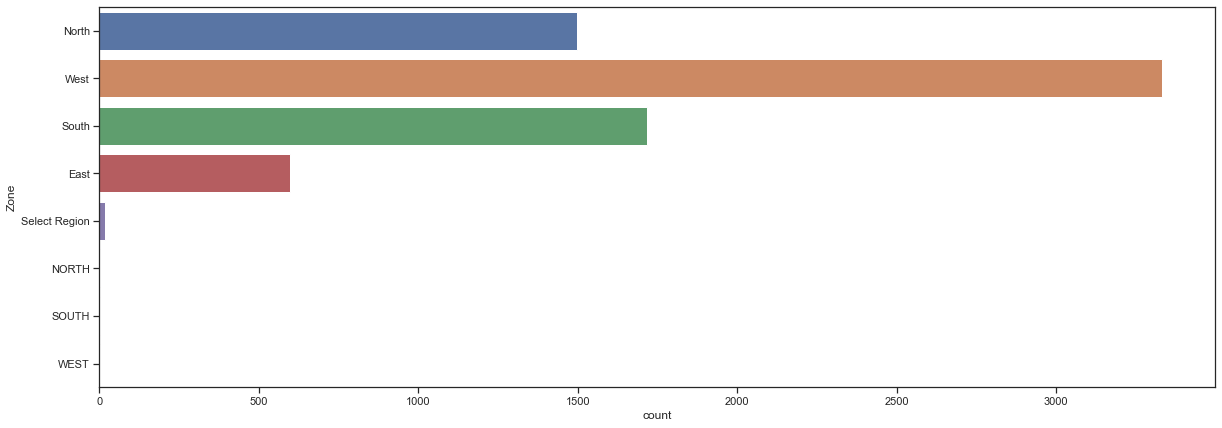

In [107]:
fig = plt.figure(figsize=(20,7))
sns.countplot(y='Zone', data=warrenty);

In [108]:
warrenty.Town.value_counts()

Mumbai              1033
Thane                372
North West Delhi     303
Salem                275
Raigarh(MH)          274
                    ... 
Karbi Anglong          1
Jehanabad              1
Ariyalur               1
Ratlam                 1
Darjiling              1
Name: Town, Length: 244, dtype: int64

In [122]:
df_pivot = pd.pivot_table(warrenty, values='Zone', index='Town',
                          aggfunc='count')
df_pivot

,Zone
Town,
Agra,116
Ahmed Nagar,15
Ahmedabad,232
Ajmer,26
Akola,1
...,...
West Delhi,10
West Godavari,5
West Singhbhum,4


<AxesSubplot:xlabel='Town'>

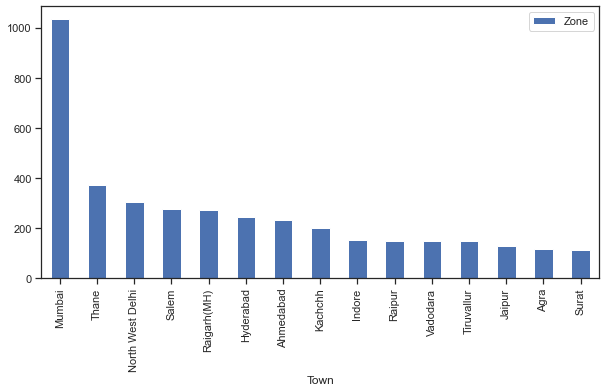

In [124]:
df_pivot.nlargest(15, ['Zone']).plot(kind='bar',figsize=(10,5))

In [125]:
df_pivot.nlargest(15, ['Zone'])

,Zone
Town,
Mumbai,1033
Thane,372
North West Delhi,303
Salem,275
Raigarh(MH),274
Hyderabad,246
Ahmedabad,232
Kachchh,199
Indore,154


<AxesSubplot:>

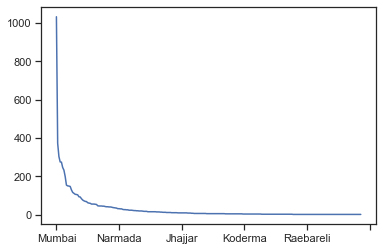

In [109]:
warrenty.Town.value_counts().plot()

In [117]:
data=warrenty.sort_values('Town').tail(5)

In [119]:
data.Town.value_counts()

Yamuna Nagar    4
Yavatmal        1
Name: Town, dtype: int64

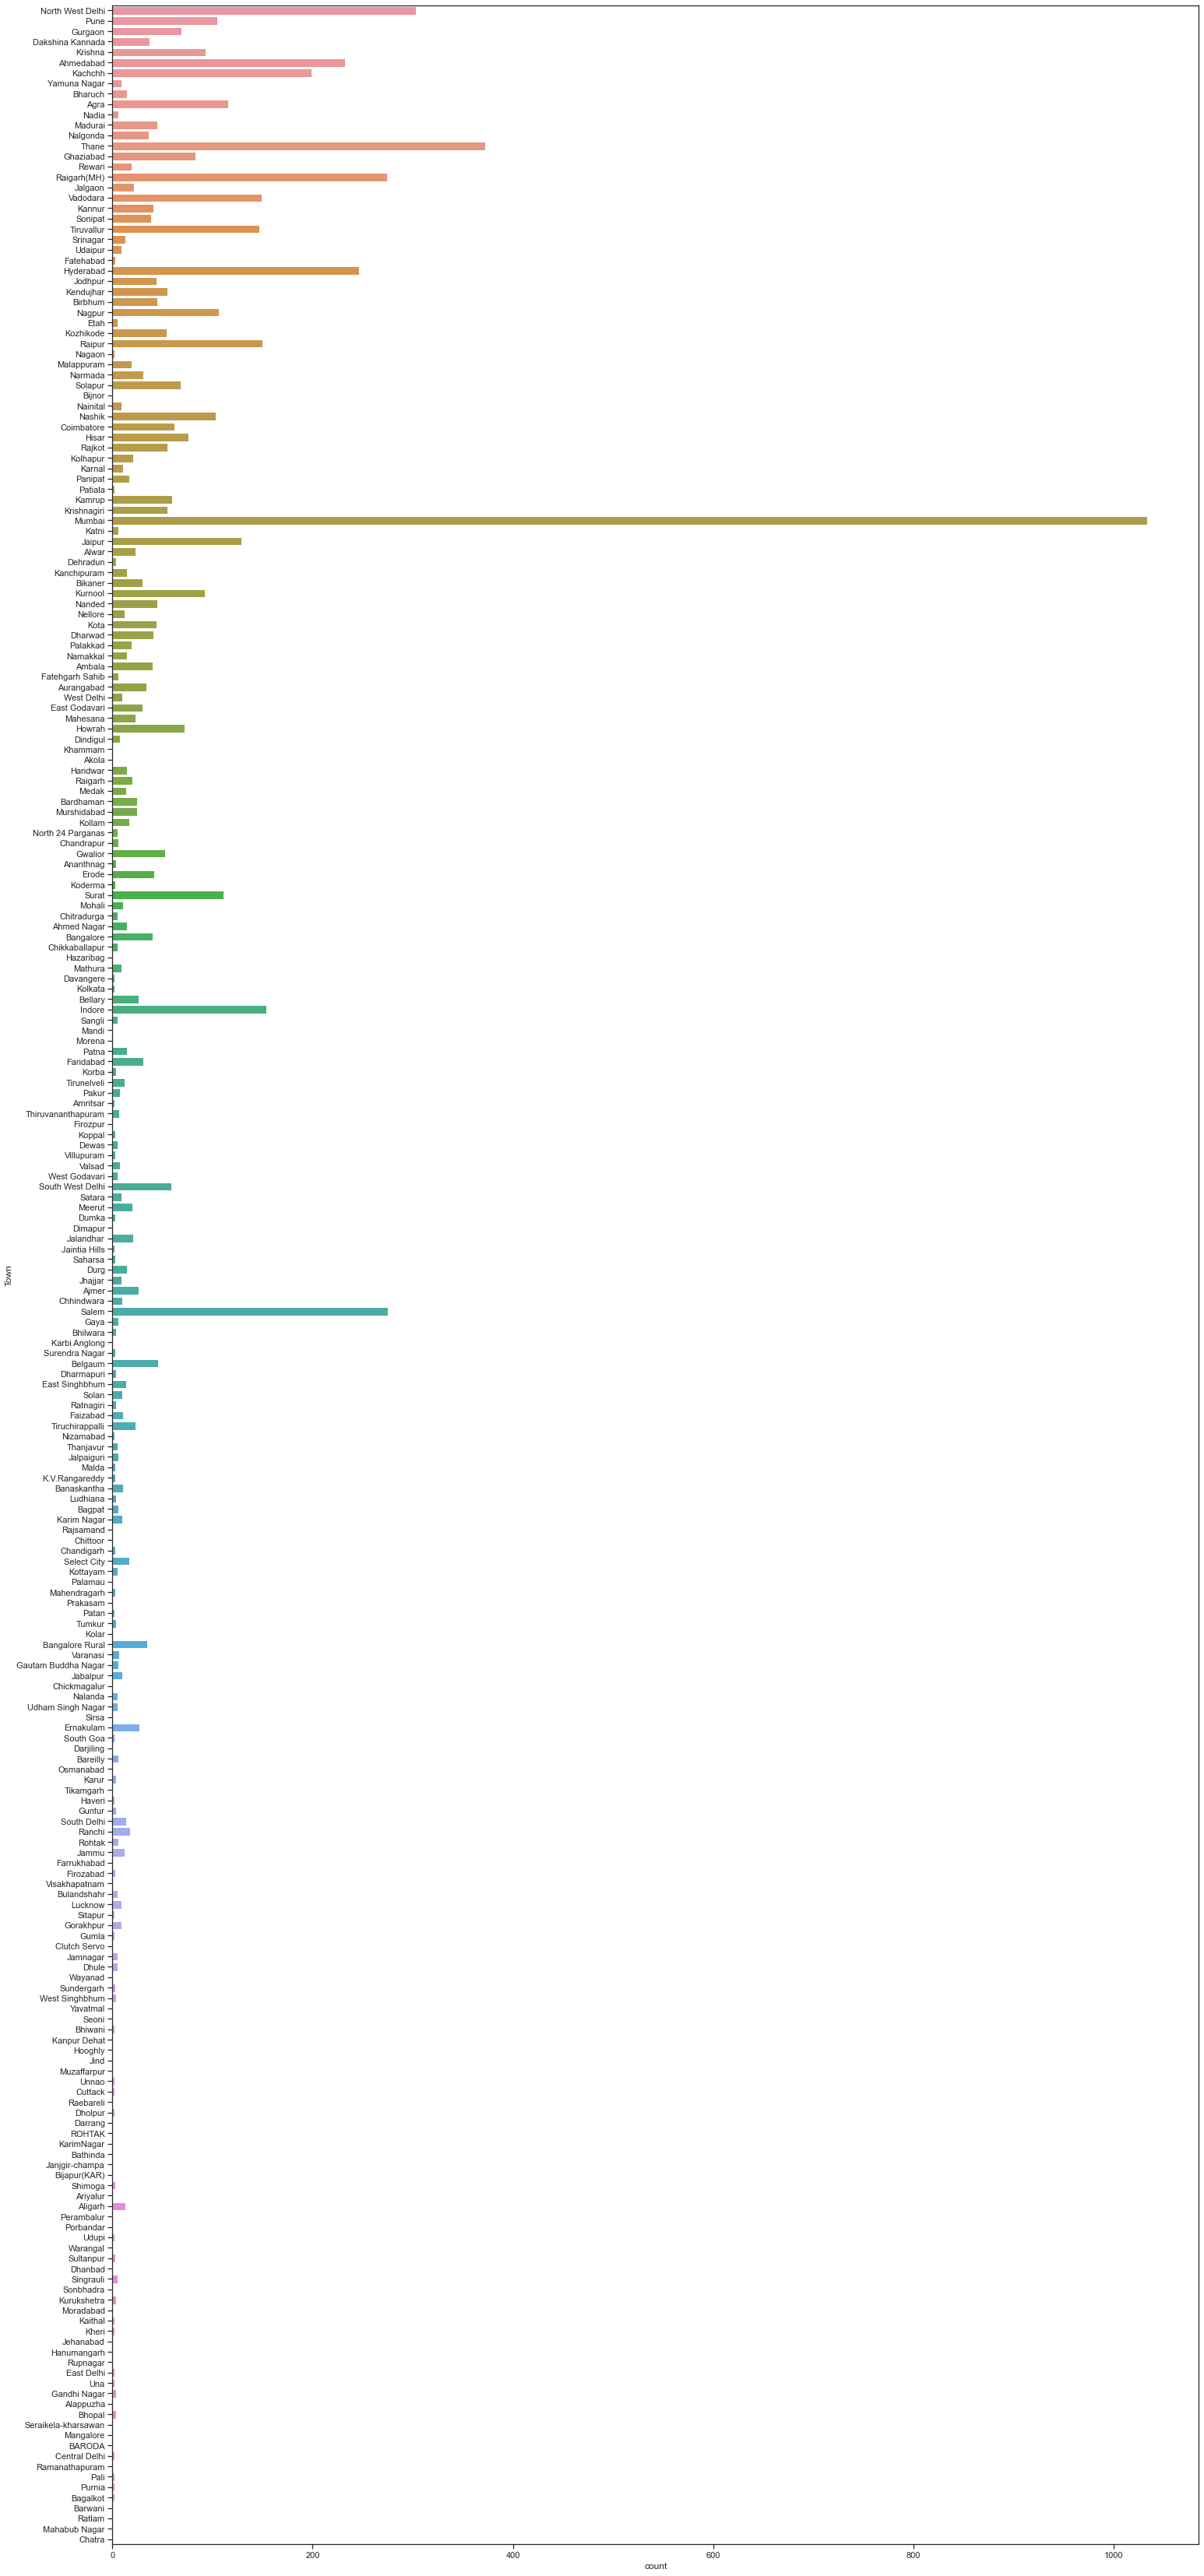

In [110]:
fig = plt.figure(figsize=(25,60))
sns.countplot(y='Town', data=warrenty);

In [111]:
warrenty['Customer /Vehicle Make'].value_counts()

Tata Motors Limited -TML             3681
Ashok Leyland                        1174
Volvo Eicher - VECV                  1086
Mahindra Trucks & Buses - MTBD        719
BEST CNG BUS - BSIV                   202
BHARAT BENZ - DICV                    186
JBM Groups                             49
Trailer Customers                      34
Swaraj Mazda Limited - SML ISSUZU      29
Action Construction Equipment Ltd       4
Force Motors                            2
Cater Pillar - CAT                      1
ISUZU                                   1
Name: Customer /Vehicle Make, dtype: int64

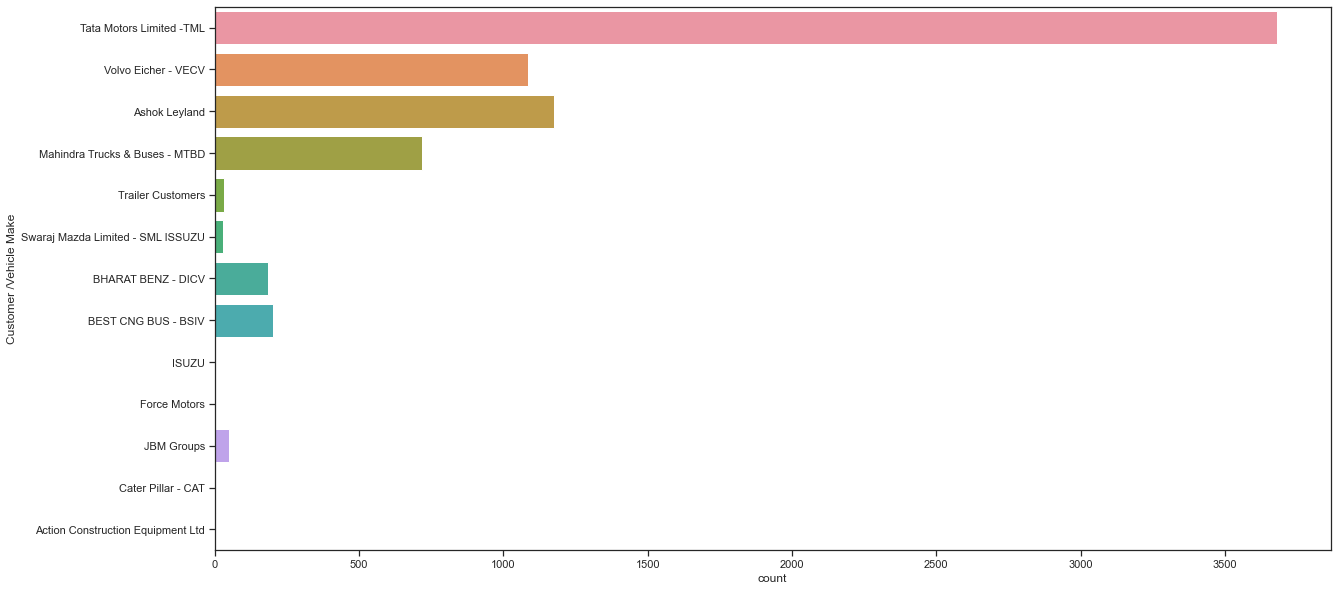

In [112]:
fig = plt.figure(figsize=(20,10))
sns.countplot(y='Customer /Vehicle Make', data=warrenty);

In [113]:
warrenty['Product family'].value_counts()

Spring Brake Actuator - SBA                        1500
Dual Brake Valve                                   1200
Compressor                                          682
Clutch Servo                                        659
Relay Valve                                         506
Air Processing Unit - APU                           504
Solenoid Modulator Valve - 24V                      395
Brake Chamber                                       273
Drying and Distribution Unit - DDU                  242
Air Processing and Distribution Assembly - APDA     215
Quick Release Valve - QRV                           182
LACV - Lift Axle Control Valve                      135
LDV - Load Detection Valve                          123
Air dryer                                           102
Inversion Relay Valve - IRV                          85
Hand Control Valve - HCV                             69
Magnetic Valve                                       60
Trailer Control Valve - TCV                     

<AxesSubplot:xlabel='count', ylabel='Product family'>

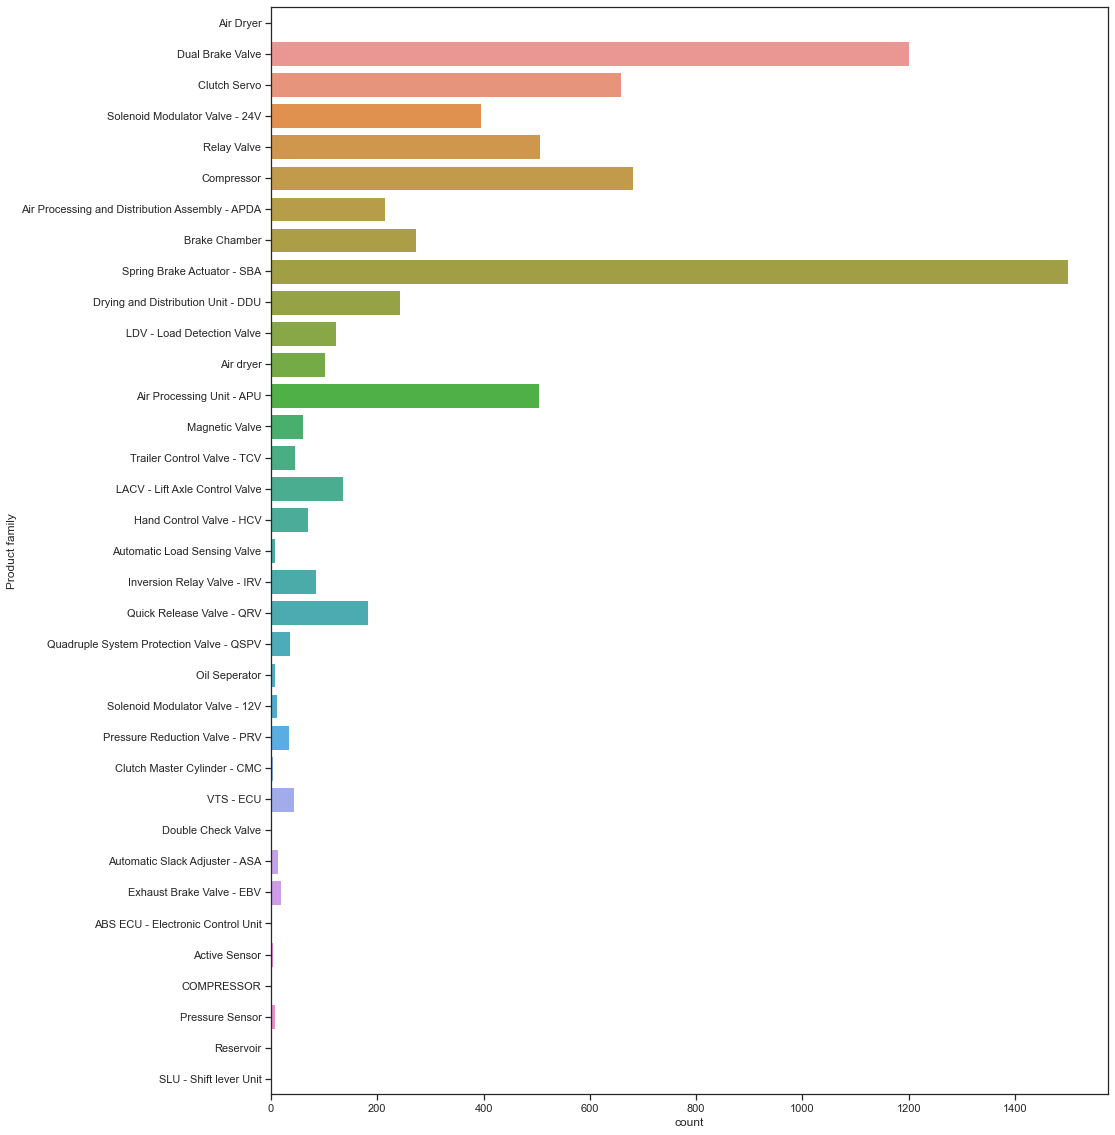

In [114]:
fig = plt.figure(figsize=(15,20))
sns.countplot(y='Product family', data=warrenty)

In [115]:
warrenty.Quantity.value_counts()

1.000000    6138
2.000000     957
4.000000      36
3.000000      25
1.156421      12
Name: Quantity, dtype: int64

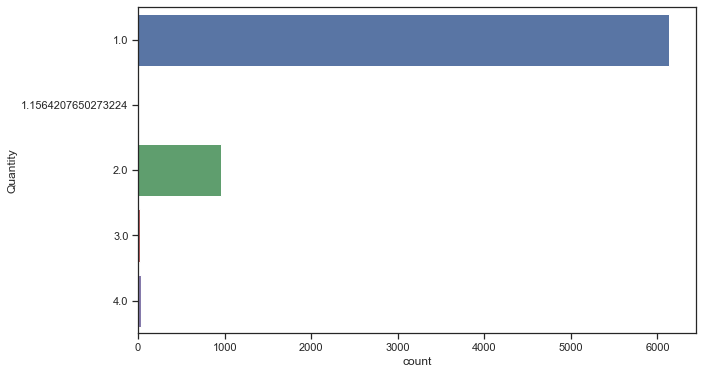

In [116]:
fig = plt.figure(figsize=(10,6))
sns.countplot(y='Quantity', data=warrenty);